# ClusterPC simulation 1

This notebook runs a simulation comparing PC with Cluster-PC. It uses the same graph and distribtuion methods and focuses on showing the effects of number of clusters, edges and alpha on the algorithms

In [1]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="tqdm")

import logging
logging.getLogger('rpy2').setLevel(logging.WARNING)

# Importing dependencies
%load_ext autoreload
%autoreload 2
import itertools
import yaml
import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from clustercausal.experiments.ExperimentRunner import ExperimentRunner
from clustercausal.utils.Utils import *
from clustercausal.experiments.Utils import load_experiment_folder

No GPU automatically detected. Setting SETTINGS.GPU to 0, and SETTINGS.NJOBS to cpu_count.
IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


The cell below executes a simulation according to the specified yaml file. To run several yaml files, it is recommended to modify the run_gridsearch.py file and run the simulation in the terminal with 

>```python clustercausal\experiments\run_gridsearch.py```

Depending on the number of experiments, the simulation can take a while. Simulation 1 takes around 60 minutes on a standard laptop. A sample yaml of all possible configurations can be found in ```clustercausal\experiments\configs\cluster_pc_all_param_configs.yaml```. It is not recommended to run that file, it is for reference only. 

To run the experiment, uncomment the code in the cell below. 

In [2]:
config_path = 'clustercausal\experiments\configs\cluster_pc_sim1_ablation_alpha.yaml'
config_path = config_path.replace('\\', '/')
experiment = ExperimentRunner(config_path)
experiment.run_gridsearch_experiment()

2025-11-27 11:59:27,289 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Number of experiments: 1400
Duration of algorithm was 0.08sec


Mean of empty slice.
invalid value encountered in double_scalars
2025-11-27 11:59:27,597 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.10sec
Duration of algorithm was 0.04sec
Duration of algorithm was 0.07sec


2025-11-27 11:59:27,815 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 11:59:27,953 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.04sec
Duration of algorithm was 0.02sec
Duration of algorithm was 0.04sec


invalid value encountered in double_scalars
invalid value encountered in double_scalars
2025-11-27 11:59:28,103 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 11:59:28,232 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.05sec
Duration of algorithm was 0.03sec
Duration of algorithm was 0.02sec
Duration of algorithm was 0.05sec


2025-11-27 11:59:28,425 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.04sec
Duration of algorithm was 0.04sec
Duration of algorithm was 0.03sec


2025-11-27 11:59:28,589 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 11:59:28,698 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.02sec
Duration of algorithm was 0.02sec
Duration of algorithm was 0.04sec


2025-11-27 11:59:28,865 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 11:59:29,017 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.06sec
Duration of algorithm was 0.03sec
Duration of algorithm was 0.03sec
Duration of algorithm was 0.05sec


2025-11-27 11:59:29,201 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.04sec
Duration of algorithm was 0.04sec
Duration of algorithm was 0.03sec


2025-11-27 11:59:29,345 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 11:59:29,465 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.02sec
Duration of algorithm was 0.02sec
Duration of algorithm was 0.03sec


2025-11-27 11:59:29,603 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.03sec
Duration of algorithm was 0.03sec
Duration of algorithm was 0.02sec


2025-11-27 11:59:29,744 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 11:59:29,861 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.02sec
Duration of algorithm was 0.03sec
Duration of algorithm was 0.06sec


2025-11-27 11:59:30,089 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.07sec
Duration of algorithm was 0.04sec
Duration of algorithm was 0.04sec


2025-11-27 11:59:30,250 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 11:59:30,416 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.06sec
Duration of algorithm was 0.04sec
Duration of algorithm was 0.03sec
Duration of algorithm was 0.02sec


2025-11-27 11:59:30,537 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 11:59:30,637 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.02sec
Duration of algorithm was 0.02sec
Duration of algorithm was 0.02sec
Duration of algorithm was 0.02sec


2025-11-27 11:59:30,731 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 11:59:30,841 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.03sec
Duration of algorithm was 0.03sec
Duration of algorithm was 0.05sec
Duration of algorithm was 0.03sec


2025-11-27 11:59:30,998 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 11:59:31,084 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 11:59:31,162 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.02sec
Duration of algorithm was 0.02sec
Duration of algorithm was 0.02sec
Duration of algorithm was 0.02sec
Duration of algorithm was 0.03sec


2025-11-27 11:59:31,300 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 11:59:31,416 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.04sec
Duration of algorithm was 0.03sec
Duration of algorithm was 0.03sec
Duration of algorithm was 0.05sec


2025-11-27 11:59:31,590 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 11:59:31,686 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.05sec
Duration of algorithm was 0.02sec
Duration of algorithm was 0.02sec
Duration of algorithm was 0.05sec


2025-11-27 11:59:31,877 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 11:59:31,992 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.03sec
Duration of algorithm was 0.03sec
Duration of algorithm was 0.03sec
Duration of algorithm was 0.03sec


2025-11-27 11:59:32,124 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 11:59:32,271 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.03sec
Duration of algorithm was 0.04sec
Duration of algorithm was 0.04sec
Duration of algorithm was 0.04sec


2025-11-27 11:59:32,418 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 11:59:32,508 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.05sec
Duration of algorithm was 0.02sec
Duration of algorithm was 0.02sec
Duration of algorithm was 0.02sec
Duration of algorithm was 0.02sec


2025-11-27 11:59:32,601 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 11:59:32,710 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.03sec
Duration of algorithm was 0.03sec
Duration of algorithm was 0.04sec


2025-11-27 11:59:32,836 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 11:59:33,021 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.03sec
Duration of algorithm was 0.05sec
Duration of algorithm was 0.04sec


2025-11-27 11:59:33,170 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.03sec
Duration of algorithm was 0.03sec


2025-11-27 11:59:33,393 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.08sec
Duration of algorithm was 0.06sec
Duration of algorithm was 0.02sec


2025-11-27 11:59:33,517 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.03sec
Duration of algorithm was 0.07sec


2025-11-27 11:59:33,711 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 11:59:33,858 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.04sec
Duration of algorithm was 0.05sec
Duration of algorithm was 0.02sec
Duration of algorithm was 0.02sec


2025-11-27 11:59:33,974 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 11:59:34,123 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.02sec
Duration of algorithm was 0.03sec
Duration of algorithm was 0.04sec
Duration of algorithm was 0.03sec


2025-11-27 11:59:34,284 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 11:59:34,417 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.04sec
Duration of algorithm was 0.03sec
Duration of algorithm was 0.03sec
Duration of algorithm was 0.02sec


2025-11-27 11:59:34,539 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.03sec
Duration of algorithm was 0.03sec
Duration of algorithm was 0.03sec


2025-11-27 11:59:34,672 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 11:59:34,828 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.05sec
Duration of algorithm was 0.02sec
Duration of algorithm was 0.02sec
Duration of algorithm was 0.02sec


2025-11-27 11:59:34,941 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 11:59:35,071 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.04sec
Duration of algorithm was 0.03sec
Duration of algorithm was 0.05sec


2025-11-27 11:59:35,251 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.07sec
Duration of algorithm was 0.08sec
Duration of algorithm was 0.04sec


2025-11-27 11:59:35,494 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 11:59:35,642 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.03sec
Duration of algorithm was 0.04sec
Duration of algorithm was 0.04sec


2025-11-27 11:59:35,817 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 11:59:35,962 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.04sec
Duration of algorithm was 0.03sec
Duration of algorithm was 0.03sec


2025-11-27 11:59:36,111 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.04sec
Duration of algorithm was 0.03sec
Duration of algorithm was 0.03sec


2025-11-27 11:59:36,278 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.03sec
Duration of algorithm was 0.03sec
Duration of algorithm was 0.03sec


2025-11-27 11:59:36,430 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 11:59:36,582 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.03sec
Duration of algorithm was 0.03sec
Duration of algorithm was 0.03sec


2025-11-27 11:59:36,724 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 11:59:36,901 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.03sec
Duration of algorithm was 0.04sec
Duration of algorithm was 0.04sec


2025-11-27 11:59:37,056 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.04sec
Duration of algorithm was 0.03sec
Duration of algorithm was 0.07sec


2025-11-27 11:59:37,319 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.07sec
Duration of algorithm was 0.07sec


2025-11-27 11:59:37,557 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 11:59:37,715 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.06sec
Duration of algorithm was 0.03sec
Duration of algorithm was 0.03sec


2025-11-27 11:59:37,964 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.08sec
Duration of algorithm was 0.04sec
Duration of algorithm was 0.05sec
Duration of algorithm was 0.04sec


2025-11-27 11:59:38,193 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 11:59:38,346 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 11:59:38,449 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.07sec
Duration of algorithm was 0.03sec
Duration of algorithm was 0.03sec
Duration of algorithm was 0.03sec
Duration of algorithm was 0.04sec


2025-11-27 11:59:38,604 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.04sec
Duration of algorithm was 0.05sec
Duration of algorithm was 0.04sec


2025-11-27 11:59:38,789 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 11:59:38,897 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.03sec
Duration of algorithm was 0.02sec
Duration of algorithm was 0.04sec


2025-11-27 11:59:39,059 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.04sec
Duration of algorithm was 0.04sec
Duration of algorithm was 0.03sec


2025-11-27 11:59:39,221 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 11:59:39,359 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.04sec
Duration of algorithm was 0.03sec
Duration of algorithm was 0.04sec
Duration of algorithm was 0.04sec


2025-11-27 11:59:39,522 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 11:59:39,667 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.03sec
Duration of algorithm was 0.03sec
Duration of algorithm was 0.08sec
Duration of algorithm was 0.06sec


2025-11-27 11:59:39,981 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.07sec
Duration of algorithm was 0.04sec


2025-11-27 11:59:40,187 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.06sec
Duration of algorithm was 0.05sec


2025-11-27 11:59:40,405 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 11:59:40,572 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.04sec
Duration of algorithm was 0.03sec
Duration of algorithm was 0.04sec


2025-11-27 11:59:40,708 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.02sec
Duration of algorithm was 0.04sec
Duration of algorithm was 0.03sec


2025-11-27 11:59:40,871 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 11:59:41,010 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.04sec
Duration of algorithm was 0.02sec
Duration of algorithm was 0.05sec


2025-11-27 11:59:41,225 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 11:59:41,362 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.05sec
Duration of algorithm was 0.04sec
Duration of algorithm was 0.03sec
Duration of algorithm was 0.04sec


2025-11-27 11:59:41,517 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 11:59:41,688 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.04sec
Duration of algorithm was 0.04sec
Duration of algorithm was 0.03sec


2025-11-27 11:59:41,845 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.05sec
Duration of algorithm was 0.02sec
Duration of algorithm was 0.03sec
Duration of algorithm was 0.02sec


2025-11-27 11:59:41,982 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 11:59:42,153 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.04sec
Duration of algorithm was 0.03sec


2025-11-27 11:59:42,367 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.06sec
Duration of algorithm was 0.04sec
Duration of algorithm was 0.04sec


2025-11-27 11:59:42,529 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 11:59:42,660 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.05sec
Duration of algorithm was 0.03sec
Duration of algorithm was 0.02sec
Duration of algorithm was 0.03sec


2025-11-27 11:59:42,803 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.03sec
Duration of algorithm was 0.04sec
Duration of algorithm was 0.04sec


2025-11-27 11:59:42,988 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.05sec
Duration of algorithm was 0.06sec


2025-11-27 11:59:43,189 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 11:59:43,356 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.05sec
Duration of algorithm was 0.03sec
Duration of algorithm was 0.03sec


2025-11-27 11:59:43,499 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 11:59:43,648 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.04sec
Duration of algorithm was 0.04sec
Duration of algorithm was 0.02sec
Duration of algorithm was 0.11sec
Duration of algorithm was 0.07sec


2025-11-27 11:59:43,947 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 11:59:44,056 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.03sec
Duration of algorithm was 0.02sec
Duration of algorithm was 0.05sec
Duration of algorithm was 0.03sec


2025-11-27 11:59:44,240 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 11:59:44,370 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.03sec
Duration of algorithm was 0.02sec
Duration of algorithm was 0.06sec


2025-11-27 11:59:44,639 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 11:59:44,764 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.06sec
Duration of algorithm was 0.02sec
Duration of algorithm was 0.03sec
Duration of algorithm was 0.03sec


2025-11-27 11:59:44,942 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.05sec
Duration of algorithm was 0.07sec
Duration of algorithm was 0.05sec


2025-11-27 11:59:45,137 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 11:59:45,320 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.07sec
Duration of algorithm was 0.03sec


2025-11-27 11:59:45,469 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.04sec
Duration of algorithm was 0.03sec
Duration of algorithm was 0.02sec
Duration of algorithm was 0.03sec


2025-11-27 11:59:45,598 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 11:59:45,789 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.06sec
Duration of algorithm was 0.03sec


2025-11-27 11:59:45,925 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.03sec
Duration of algorithm was 0.03sec
Duration of algorithm was 0.05sec


2025-11-27 11:59:46,121 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 11:59:46,281 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.06sec
Duration of algorithm was 0.03sec
Duration of algorithm was 0.03sec


2025-11-27 11:59:46,482 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.08sec
Duration of algorithm was 0.05sec
Duration of algorithm was 0.04sec


2025-11-27 11:59:46,637 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.03sec
Duration of algorithm was 0.05sec
Duration of algorithm was 0.03sec


2025-11-27 11:59:46,807 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 11:59:46,965 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.05sec
Duration of algorithm was 0.04sec
Duration of algorithm was 0.02sec


2025-11-27 11:59:47,076 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 11:59:47,220 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.04sec
Duration of algorithm was 0.04sec
Duration of algorithm was 0.03sec


2025-11-27 11:59:47,390 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.05sec
Duration of algorithm was 0.04sec
Duration of algorithm was 0.05sec


2025-11-27 11:59:47,611 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 11:59:47,731 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.07sec
Duration of algorithm was 0.02sec
Duration of algorithm was 0.02sec
Duration of algorithm was 0.03sec


2025-11-27 11:59:47,862 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.03sec
Duration of algorithm was 0.03sec


2025-11-27 11:59:48,154 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.18sec
Duration of algorithm was 0.06sec
Duration of algorithm was 0.03sec


2025-11-27 11:59:48,321 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 11:59:48,460 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.04sec
Duration of algorithm was 0.03sec
Duration of algorithm was 0.03sec
Duration of algorithm was 0.02sec


2025-11-27 11:59:48,601 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 11:59:48,727 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.03sec
Duration of algorithm was 0.02sec
Duration of algorithm was 0.02sec


2025-11-27 11:59:48,842 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.02sec
Duration of algorithm was 0.03sec
Duration of algorithm was 0.03sec


2025-11-27 11:59:48,987 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 11:59:49,101 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.03sec
Duration of algorithm was 0.02sec
Duration of algorithm was 0.02sec
Duration of algorithm was 0.02sec


2025-11-27 11:59:49,234 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 11:59:49,378 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.04sec
Duration of algorithm was 0.03sec
Duration of algorithm was 0.05sec
Duration of algorithm was 0.08sec


2025-11-27 11:59:49,870 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.08sec


2025-11-27 11:59:50,128 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.06sec
Duration of algorithm was 0.13sec


2025-11-27 11:59:50,494 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 11:59:50,638 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.09sec
Duration of algorithm was 0.04sec
Duration of algorithm was 0.02sec


2025-11-27 11:59:50,784 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.02sec
Duration of algorithm was 0.03sec
Duration of algorithm was 0.03sec


2025-11-27 11:59:50,943 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.03sec
Duration of algorithm was 0.05sec
Duration of algorithm was 0.04sec


2025-11-27 11:59:51,126 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 11:59:51,294 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.05sec
Duration of algorithm was 0.03sec


2025-11-27 11:59:51,421 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.03sec
Duration of algorithm was 0.02sec
Duration of algorithm was 0.02sec
Duration of algorithm was 0.02sec


2025-11-27 11:59:51,531 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.07sec
Duration of algorithm was 0.04sec


2025-11-27 11:59:51,743 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 11:59:51,900 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.04sec
Duration of algorithm was 0.03sec
Duration of algorithm was 0.04sec


2025-11-27 11:59:52,086 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.04sec
Duration of algorithm was 0.06sec


2025-11-27 11:59:52,321 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.06sec
Duration of algorithm was 0.07sec


2025-11-27 11:59:52,576 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.07sec
Duration of algorithm was 0.03sec
Duration of algorithm was 0.04sec


2025-11-27 11:59:52,738 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 11:59:52,945 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.06sec
Duration of algorithm was 0.05sec


2025-11-27 11:59:53,165 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.05sec
Duration of algorithm was 0.05sec


2025-11-27 11:59:53,327 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.04sec
Duration of algorithm was 0.03sec
Duration of algorithm was 0.04sec


2025-11-27 11:59:53,516 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.06sec
Duration of algorithm was 0.02sec
Duration of algorithm was 0.02sec


2025-11-27 11:59:53,651 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 11:59:53,890 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.07sec
Duration of algorithm was 0.04sec
Duration of algorithm was 0.03sec


2025-11-27 11:59:54,009 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 11:59:54,149 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.03sec
Duration of algorithm was 0.04sec
Duration of algorithm was 0.02sec
Duration of algorithm was 0.04sec


2025-11-27 11:59:54,301 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 11:59:54,451 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.03sec
Duration of algorithm was 0.03sec
Duration of algorithm was 0.03sec


2025-11-27 11:59:54,629 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.05sec
Duration of algorithm was 0.03sec
Duration of algorithm was 0.04sec


2025-11-27 11:59:54,768 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 11:59:54,935 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.04sec
Duration of algorithm was 0.04sec
Duration of algorithm was 0.03sec


2025-11-27 11:59:55,116 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.04sec
Duration of algorithm was 0.04sec
Duration of algorithm was 0.04sec


2025-11-27 11:59:55,276 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.03sec
Duration of algorithm was 0.04sec
Duration of algorithm was 0.03sec


2025-11-27 11:59:55,455 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 11:59:55,557 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 11:59:55,631 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.02sec
Duration of algorithm was 0.01sec
Duration of algorithm was 0.02sec
Duration of algorithm was 0.02sec
Duration of algorithm was 0.03sec


2025-11-27 11:59:55,789 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 11:59:55,933 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.04sec
Duration of algorithm was 0.04sec
Duration of algorithm was 0.03sec


2025-11-27 11:59:56,084 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.04sec
Duration of algorithm was 0.03sec
Duration of algorithm was 0.05sec


2025-11-27 11:59:56,279 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.04sec
Duration of algorithm was 0.05sec
Duration of algorithm was 0.04sec


2025-11-27 11:59:56,467 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 11:59:56,613 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.04sec
Duration of algorithm was 0.03sec
Duration of algorithm was 0.03sec


2025-11-27 11:59:56,751 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.03sec
Duration of algorithm was 0.04sec
Duration of algorithm was 0.04sec


2025-11-27 11:59:56,940 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 11:59:57,093 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.02sec
Duration of algorithm was 0.03sec
Duration of algorithm was 0.02sec


2025-11-27 11:59:57,218 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 11:59:57,346 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.03sec
Duration of algorithm was 0.03sec
Duration of algorithm was 0.02sec
Duration of algorithm was 0.03sec


2025-11-27 11:59:57,474 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 11:59:57,604 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.02sec
Duration of algorithm was 0.04sec
Duration of algorithm was 0.03sec
Duration of algorithm was 0.03sec


2025-11-27 11:59:57,740 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 11:59:57,891 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.03sec
Duration of algorithm was 0.03sec
Duration of algorithm was 0.03sec


2025-11-27 11:59:58,030 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.04sec
Duration of algorithm was 0.03sec
Duration of algorithm was 0.03sec
Duration of algorithm was 0.03sec


2025-11-27 11:59:58,176 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 11:59:58,345 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.05sec
Duration of algorithm was 0.05sec
Duration of algorithm was 0.04sec


2025-11-27 11:59:58,491 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 11:59:58,650 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.03sec
Duration of algorithm was 0.03sec
Duration of algorithm was 0.03sec


2025-11-27 11:59:58,838 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.05sec
Duration of algorithm was 0.04sec
Duration of algorithm was 0.05sec


2025-11-27 11:59:59,065 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.04sec
Duration of algorithm was 0.06sec


2025-11-27 11:59:59,288 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.06sec
Duration of algorithm was 0.05sec
Duration of algorithm was 0.05sec


2025-11-27 11:59:59,489 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 11:59:59,611 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.03sec
Duration of algorithm was 0.03sec
Duration of algorithm was 0.03sec


2025-11-27 11:59:59,761 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 11:59:59,848 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.03sec
Duration of algorithm was 0.02sec
Duration of algorithm was 0.02sec
Duration of algorithm was 0.01sec
Duration of algorithm was 0.02sec


2025-11-27 11:59:59,960 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 12:00:00,099 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.03sec
Duration of algorithm was 0.02sec
Duration of algorithm was 0.04sec


2025-11-27 12:00:00,242 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 12:00:00,380 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.03sec
Duration of algorithm was 0.04sec
Duration of algorithm was 0.03sec
Duration of algorithm was 0.02sec


2025-11-27 12:00:00,467 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 12:00:00,549 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.02sec
Duration of algorithm was 0.02sec
Duration of algorithm was 0.02sec
Duration of algorithm was 0.04sec
Duration of algorithm was 0.03sec


2025-11-27 12:00:00,679 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 12:00:00,817 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.06sec
Duration of algorithm was 0.02sec
Duration of algorithm was 0.03sec


2025-11-27 12:00:00,925 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 12:00:01,033 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.02sec
Duration of algorithm was 0.02sec
Duration of algorithm was 0.02sec
Duration of algorithm was 0.02sec


2025-11-27 12:00:01,156 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 12:00:01,298 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.03sec
Duration of algorithm was 0.05sec
Duration of algorithm was 0.03sec
Duration of algorithm was 0.04sec


2025-11-27 12:00:01,447 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 12:00:01,579 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.04sec
Duration of algorithm was 0.03sec
Duration of algorithm was 0.04sec
Duration of algorithm was 0.04sec


2025-11-27 12:00:01,709 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 12:00:01,843 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.04sec
Duration of algorithm was 0.03sec
Duration of algorithm was 0.04sec
Duration of algorithm was 0.05sec


2025-11-27 12:00:01,992 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 12:00:02,096 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.04sec
Duration of algorithm was 0.03sec
Duration of algorithm was 0.02sec
Duration of algorithm was 0.05sec


2025-11-27 12:00:02,276 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 12:00:02,425 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.05sec
Duration of algorithm was 0.05sec
Duration of algorithm was 0.03sec
Duration of algorithm was 0.02sec


2025-11-27 12:00:02,512 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 12:00:02,674 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.02sec
Duration of algorithm was 0.05sec
Duration of algorithm was 0.04sec
Duration of algorithm was 0.03sec


2025-11-27 12:00:02,821 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 12:00:02,938 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.03sec
Duration of algorithm was 0.03sec
Duration of algorithm was 0.03sec
Duration of algorithm was 0.02sec


2025-11-27 12:00:03,079 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.02sec
Duration of algorithm was 0.02sec
Duration of algorithm was 0.03sec


2025-11-27 12:00:03,226 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 12:00:03,459 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.04sec
Duration of algorithm was 0.06sec


2025-11-27 12:00:03,598 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.04sec
Duration of algorithm was 0.03sec
Duration of algorithm was 0.03sec


2025-11-27 12:00:03,729 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 12:00:03,900 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.02sec
Duration of algorithm was 0.05sec
Duration of algorithm was 0.05sec
Duration of algorithm was 0.02sec


2025-11-27 12:00:04,034 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.03sec
Duration of algorithm was 0.08sec


2025-11-27 12:00:04,564 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.27sec
Duration of algorithm was 0.05sec
Duration of algorithm was 0.03sec


2025-11-27 12:00:04,755 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 12:00:04,926 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.04sec
Duration of algorithm was 0.05sec
Duration of algorithm was 0.03sec


2025-11-27 12:00:05,062 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.03sec
Duration of algorithm was 0.05sec
Duration of algorithm was 0.04sec


2025-11-27 12:00:05,283 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 12:00:05,468 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.05sec
Duration of algorithm was 0.04sec


2025-11-27 12:00:05,631 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.02sec
Duration of algorithm was 0.04sec
Duration of algorithm was 0.06sec


2025-11-27 12:00:05,859 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.04sec
Duration of algorithm was 0.07sec
Duration of algorithm was 0.03sec


2025-11-27 12:00:06,016 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 12:00:06,137 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.02sec
Duration of algorithm was 0.02sec
Duration of algorithm was 0.02sec
Duration of algorithm was 0.02sec


2025-11-27 12:00:06,267 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 12:00:06,444 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.05sec
Duration of algorithm was 0.03sec


2025-11-27 12:00:06,576 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.03sec
Duration of algorithm was 0.02sec
Duration of algorithm was 0.02sec
Duration of algorithm was 0.02sec


2025-11-27 12:00:06,694 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 12:00:06,836 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.03sec
Duration of algorithm was 0.03sec
Duration of algorithm was 0.02sec


2025-11-27 12:00:06,968 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 12:00:07,142 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.03sec
Duration of algorithm was 0.02sec
Duration of algorithm was 0.03sec


2025-11-27 12:00:07,331 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.05sec
Duration of algorithm was 0.04sec
Duration of algorithm was 0.02sec


2025-11-27 12:00:07,448 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 12:00:07,603 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.02sec
Duration of algorithm was 0.02sec
Duration of algorithm was 0.03sec


2025-11-27 12:00:07,782 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.05sec
Duration of algorithm was 0.05sec
Duration of algorithm was 0.02sec
Duration of algorithm was 0.02sec


2025-11-27 12:00:07,897 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.04sec
Duration of algorithm was 0.03sec


2025-11-27 12:00:08,095 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.09sec


2025-11-27 12:00:08,568 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 12:00:08,711 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.06sec
Duration of algorithm was 0.02sec


2025-11-27 12:00:08,893 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.02sec
Duration of algorithm was 0.04sec
Duration of algorithm was 0.04sec


2025-11-27 12:00:09,112 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.04sec
Duration of algorithm was 0.02sec
Duration of algorithm was 0.03sec


2025-11-27 12:00:09,253 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 12:00:09,460 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.05sec
Duration of algorithm was 0.03sec
Duration of algorithm was 0.03sec


2025-11-27 12:00:09,678 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 12:00:09,807 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.07sec
Duration of algorithm was 0.03sec
Duration of algorithm was 0.04sec


2025-11-27 12:00:09,942 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.03sec
Duration of algorithm was 0.02sec
Duration of algorithm was 0.05sec


2025-11-27 12:00:10,147 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 12:00:10,300 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.06sec
Duration of algorithm was 0.03sec
Duration of algorithm was 0.03sec


2025-11-27 12:00:10,461 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.03sec
Duration of algorithm was 0.04sec
Duration of algorithm was 0.03sec


2025-11-27 12:00:10,609 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.03sec
Duration of algorithm was 0.06sec


2025-11-27 12:00:10,853 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 12:00:10,970 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.08sec
Duration of algorithm was 0.05sec
Duration of algorithm was 0.02sec
Duration of algorithm was 0.02sec


2025-11-27 12:00:11,103 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.03sec
Duration of algorithm was 0.03sec
Duration of algorithm was 0.02sec


2025-11-27 12:00:11,244 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 12:00:11,409 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.06sec
Duration of algorithm was 0.04sec
Duration of algorithm was 0.02sec
Duration of algorithm was 0.03sec


2025-11-27 12:00:11,553 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 12:00:11,715 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.04sec
Duration of algorithm was 0.03sec
Duration of algorithm was 0.03sec


2025-11-27 12:00:11,883 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 12:00:12,002 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.05sec
Duration of algorithm was 0.02sec
Duration of algorithm was 0.02sec
Duration of algorithm was 0.04sec


2025-11-27 12:00:12,177 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 12:00:12,285 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.04sec
Duration of algorithm was 0.02sec
Duration of algorithm was 0.03sec
Duration of algorithm was 0.03sec


2025-11-27 12:00:12,493 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 12:00:12,624 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.05sec
Duration of algorithm was 0.02sec
Duration of algorithm was 0.03sec
Duration of algorithm was 0.11sec
Duration of algorithm was 0.10sec


2025-11-27 12:00:12,996 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 12:00:13,140 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.03sec
Duration of algorithm was 0.03sec
Duration of algorithm was 0.05sec


2025-11-27 12:00:13,398 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.05sec
Duration of algorithm was 0.07sec


2025-11-27 12:00:13,649 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.07sec
Duration of algorithm was 0.09sec


2025-11-27 12:00:13,981 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.09sec
Duration of algorithm was 0.10sec


2025-11-27 12:00:14,224 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.06sec
Duration of algorithm was 0.06sec


2025-11-27 12:00:14,500 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.09sec
Duration of algorithm was 0.07sec


2025-11-27 12:00:14,770 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.07sec
Duration of algorithm was 0.09sec


2025-11-27 12:00:15,087 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.08sec
Duration of algorithm was 0.11sec


2025-11-27 12:00:15,457 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.09sec
Duration of algorithm was 0.09sec


2025-11-27 12:00:15,788 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.07sec
Duration of algorithm was 0.10sec


2025-11-27 12:00:16,142 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.12sec


2025-11-27 12:00:16,544 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.10sec


2025-11-27 12:00:16,906 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.08sec


2025-11-27 12:00:17,153 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.07sec
Duration of algorithm was 0.11sec


2025-11-27 12:00:17,475 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.10sec
Duration of algorithm was 0.11sec


2025-11-27 12:00:17,813 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.08sec


2025-11-27 12:00:18,141 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.09sec
Duration of algorithm was 0.10sec


2025-11-27 12:00:18,392 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.05sec
Duration of algorithm was 0.07sec


2025-11-27 12:00:18,691 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 12:00:18,839 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.09sec
Duration of algorithm was 0.04sec
Duration of algorithm was 0.04sec


2025-11-27 12:00:19,048 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.05sec
Duration of algorithm was 0.05sec
Duration of algorithm was 0.09sec


2025-11-27 12:00:19,518 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.19sec
Duration of algorithm was 0.24sec
Duration of algorithm was 0.08sec


2025-11-27 12:00:19,987 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec


2025-11-27 12:00:20,377 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.10sec
Duration of algorithm was 0.10sec


2025-11-27 12:00:20,761 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.08sec
Duration of algorithm was 0.13sec


2025-11-27 12:00:21,104 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.08sec
Duration of algorithm was 0.15sec


2025-11-27 12:00:21,577 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.13sec


2025-11-27 12:00:22,043 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.09sec


2025-11-27 12:00:22,397 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.09sec
Duration of algorithm was 0.13sec


2025-11-27 12:00:22,811 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.09sec
Duration of algorithm was 0.22sec


2025-11-27 12:00:23,359 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.13sec


2025-11-27 12:00:23,808 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.28sec


2025-11-27 12:00:24,608 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.23sec
Duration of algorithm was 0.11sec


2025-11-27 12:00:25,073 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.14sec


2025-11-27 12:00:25,487 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.19sec


2025-11-27 12:00:25,994 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.13sec


2025-11-27 12:00:26,400 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.20sec


2025-11-27 12:00:26,979 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.13sec


2025-11-27 12:00:27,374 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.08sec
Duration of algorithm was 0.13sec


2025-11-27 12:00:27,796 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.08sec
Duration of algorithm was 0.06sec


2025-11-27 12:00:28,048 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.07sec
Duration of algorithm was 0.16sec


2025-11-27 12:00:28,473 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.09sec
Duration of algorithm was 0.09sec


2025-11-27 12:00:28,811 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.10sec
Duration of algorithm was 0.10sec


2025-11-27 12:00:29,162 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.09sec
Duration of algorithm was 0.09sec


2025-11-27 12:00:29,535 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.13sec


2025-11-27 12:00:29,941 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.10sec


2025-11-27 12:00:30,272 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.13sec


2025-11-27 12:00:30,721 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.13sec


2025-11-27 12:00:31,163 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.10sec
Duration of algorithm was 0.13sec


2025-11-27 12:00:31,530 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.10sec
Duration of algorithm was 0.20sec


2025-11-27 12:00:32,169 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.22sec
Duration of algorithm was 0.21sec


2025-11-27 12:00:32,726 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.13sec


2025-11-27 12:00:33,071 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.07sec
Duration of algorithm was 0.17sec


2025-11-27 12:00:33,566 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.15sec


2025-11-27 12:00:34,171 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.19sec
Duration of algorithm was 0.18sec


2025-11-27 12:00:34,848 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.21sec
Duration of algorithm was 0.11sec


2025-11-27 12:00:35,237 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.09sec
Duration of algorithm was 0.18sec


2025-11-27 12:00:35,811 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.13sec


2025-11-27 12:00:36,180 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.10sec
Duration of algorithm was 0.15sec


2025-11-27 12:00:36,627 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.10sec
Duration of algorithm was 0.11sec


2025-11-27 12:00:36,993 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.08sec
Duration of algorithm was 0.13sec


2025-11-27 12:00:37,421 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.10sec
Duration of algorithm was 0.11sec


2025-11-27 12:00:37,764 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.09sec
Duration of algorithm was 0.13sec


2025-11-27 12:00:38,116 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.09sec
Duration of algorithm was 0.10sec


2025-11-27 12:00:38,506 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.09sec
Duration of algorithm was 0.25sec


2025-11-27 12:00:39,035 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.10sec
Duration of algorithm was 0.14sec


2025-11-27 12:00:39,488 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.12sec


2025-11-27 12:00:39,933 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.09sec


2025-11-27 12:00:40,285 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.13sec


2025-11-27 12:00:40,796 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.10sec


2025-11-27 12:00:41,140 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.09sec
Duration of algorithm was 0.12sec


2025-11-27 12:00:41,472 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.09sec
Duration of algorithm was 0.11sec


2025-11-27 12:00:41,815 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.10sec
Duration of algorithm was 0.05sec


2025-11-27 12:00:42,055 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.08sec
Duration of algorithm was 0.12sec


2025-11-27 12:00:42,396 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.09sec
Duration of algorithm was 0.09sec


2025-11-27 12:00:42,729 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.10sec
Duration of algorithm was 0.14sec


2025-11-27 12:00:43,222 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.08sec


2025-11-27 12:00:43,537 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.07sec
Duration of algorithm was 0.09sec


2025-11-27 12:00:43,880 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.09sec
Duration of algorithm was 0.09sec


2025-11-27 12:00:44,160 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.06sec
Duration of algorithm was 0.07sec


2025-11-27 12:00:44,428 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.08sec
Duration of algorithm was 0.10sec


2025-11-27 12:00:44,782 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.09sec
Duration of algorithm was 0.09sec


2025-11-27 12:00:45,055 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.07sec
Duration of algorithm was 0.06sec


2025-11-27 12:00:45,304 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.07sec
Duration of algorithm was 0.07sec


2025-11-27 12:00:45,593 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.08sec
Duration of algorithm was 0.09sec


2025-11-27 12:00:45,880 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.07sec
Duration of algorithm was 0.09sec


2025-11-27 12:00:46,245 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.09sec
Duration of algorithm was 0.05sec
Duration of algorithm was 0.05sec


2025-11-27 12:00:46,449 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.09sec


2025-11-27 12:00:46,691 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.07sec
Duration of algorithm was 0.10sec


2025-11-27 12:00:47,048 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.10sec
Duration of algorithm was 0.08sec


2025-11-27 12:00:47,382 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.10sec
Duration of algorithm was 0.08sec


2025-11-27 12:00:47,680 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.09sec
Duration of algorithm was 0.08sec


2025-11-27 12:00:48,001 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.09sec
Duration of algorithm was 0.09sec


2025-11-27 12:00:48,321 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.09sec
Duration of algorithm was 0.07sec


2025-11-27 12:00:48,745 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.18sec
Duration of algorithm was 0.23sec
Duration of algorithm was 0.09sec


2025-11-27 12:00:49,232 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.06sec
Duration of algorithm was 0.07sec


2025-11-27 12:00:49,448 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.09sec


2025-11-27 12:00:49,795 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.10sec
Duration of algorithm was 0.09sec


2025-11-27 12:00:50,164 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.09sec
Duration of algorithm was 0.09sec


2025-11-27 12:00:50,525 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.10sec
Duration of algorithm was 0.09sec


2025-11-27 12:00:50,866 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.08sec
Duration of algorithm was 0.07sec


2025-11-27 12:00:51,147 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.07sec
Duration of algorithm was 0.09sec


2025-11-27 12:00:51,420 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.07sec
Duration of algorithm was 0.07sec


2025-11-27 12:00:51,699 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.07sec
Duration of algorithm was 0.05sec


2025-11-27 12:00:51,920 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.06sec
Duration of algorithm was 0.07sec


2025-11-27 12:00:52,195 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.08sec
Duration of algorithm was 0.08sec


2025-11-27 12:00:52,529 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.09sec
Duration of algorithm was 0.06sec


2025-11-27 12:00:52,752 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.07sec
Duration of algorithm was 0.07sec


2025-11-27 12:00:53,039 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.08sec
Duration of algorithm was 0.05sec


2025-11-27 12:00:53,275 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.05sec
Duration of algorithm was 0.05sec
Duration of algorithm was 0.04sec


2025-11-27 12:00:53,447 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.08sec


2025-11-27 12:00:53,759 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.08sec


2025-11-27 12:00:54,071 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.09sec
Duration of algorithm was 0.05sec
Duration of algorithm was 0.05sec


2025-11-27 12:00:54,276 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.06sec
Duration of algorithm was 0.06sec


2025-11-27 12:00:54,508 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.07sec


2025-11-27 12:00:54,769 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.08sec
Duration of algorithm was 0.12sec


2025-11-27 12:00:55,267 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.04sec
Duration of algorithm was 0.03sec


2025-11-27 12:00:55,420 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.07sec
Duration of algorithm was 0.10sec


2025-11-27 12:00:55,973 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec


2025-11-27 12:00:56,304 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.07sec
Duration of algorithm was 0.07sec


2025-11-27 12:00:56,566 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.07sec
Duration of algorithm was 0.06sec


2025-11-27 12:00:56,824 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.07sec
Duration of algorithm was 0.08sec


2025-11-27 12:00:57,113 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.09sec
Duration of algorithm was 0.09sec


2025-11-27 12:00:57,400 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.09sec
Duration of algorithm was 0.07sec
Duration of algorithm was 0.07sec


2025-11-27 12:00:57,649 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.08sec


2025-11-27 12:00:57,904 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 12:00:58,090 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.08sec
Duration of algorithm was 0.04sec
Duration of algorithm was 0.06sec


2025-11-27 12:00:58,312 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.05sec
Duration of algorithm was 0.06sec
Duration of algorithm was 0.10sec
Duration of algorithm was 0.08sec


2025-11-27 12:00:58,663 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.10sec


2025-11-27 12:00:59,079 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.06sec


2025-11-27 12:00:59,309 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.06sec
Duration of algorithm was 0.09sec


2025-11-27 12:00:59,637 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.09sec
Duration of algorithm was 0.09sec


2025-11-27 12:01:00,018 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.06sec


2025-11-27 12:01:00,223 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.07sec
Duration of algorithm was 0.07sec


2025-11-27 12:01:00,467 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.06sec
Duration of algorithm was 0.09sec


2025-11-27 12:01:00,820 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.07sec


2025-11-27 12:01:01,060 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 12:01:01,204 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.08sec
Duration of algorithm was 0.04sec
Duration of algorithm was 0.04sec
Duration of algorithm was 0.08sec
Duration of algorithm was 0.09sec


2025-11-27 12:01:01,491 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.09sec
Duration of algorithm was 0.09sec


2025-11-27 12:01:01,807 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.06sec
Duration of algorithm was 0.08sec


2025-11-27 12:01:02,061 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 12:01:02,236 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.06sec
Duration of algorithm was 0.05sec
Duration of algorithm was 0.07sec


2025-11-27 12:01:02,530 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.10sec
Duration of algorithm was 0.08sec


2025-11-27 12:01:02,845 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.09sec
Duration of algorithm was 0.09sec


2025-11-27 12:01:03,215 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.09sec
Duration of algorithm was 0.07sec


2025-11-27 12:01:03,536 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.09sec
Duration of algorithm was 0.13sec


2025-11-27 12:01:03,984 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.09sec


2025-11-27 12:01:04,314 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.10sec
Duration of algorithm was 0.06sec


2025-11-27 12:01:04,552 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.06sec
Duration of algorithm was 0.06sec


2025-11-27 12:01:04,789 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.07sec
Duration of algorithm was 0.10sec


2025-11-27 12:01:05,130 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.10sec
Duration of algorithm was 0.11sec


2025-11-27 12:01:05,460 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.08sec
Duration of algorithm was 0.10sec


2025-11-27 12:01:05,799 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.10sec
Duration of algorithm was 0.10sec


2025-11-27 12:01:06,223 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.08sec


2025-11-27 12:01:06,458 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.06sec
Duration of algorithm was 0.07sec


2025-11-27 12:01:06,755 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.09sec
Duration of algorithm was 0.07sec


2025-11-27 12:01:07,012 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.07sec
Duration of algorithm was 0.09sec


2025-11-27 12:01:07,319 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.08sec
Duration of algorithm was 0.10sec


2025-11-27 12:01:07,628 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.07sec
Duration of algorithm was 0.11sec


2025-11-27 12:01:08,022 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.10sec
Duration of algorithm was 0.06sec


2025-11-27 12:01:08,291 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.08sec
Duration of algorithm was 0.05sec


2025-11-27 12:01:08,504 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.05sec
Duration of algorithm was 0.06sec


2025-11-27 12:01:08,747 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.07sec
Duration of algorithm was 0.06sec


2025-11-27 12:01:08,998 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.07sec
Duration of algorithm was 0.09sec


2025-11-27 12:01:09,337 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.09sec
Duration of algorithm was 0.08sec


2025-11-27 12:01:09,580 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.06sec
Duration of algorithm was 0.07sec


2025-11-27 12:01:09,805 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.08sec
Duration of algorithm was 0.07sec


2025-11-27 12:01:10,100 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.08sec
Duration of algorithm was 0.06sec


2025-11-27 12:01:10,348 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.07sec
Duration of algorithm was 0.13sec


2025-11-27 12:01:10,851 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.07sec


2025-11-27 12:01:11,147 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.08sec
Duration of algorithm was 0.06sec


2025-11-27 12:01:11,363 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.06sec
Duration of algorithm was 0.09sec


2025-11-27 12:01:11,712 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.08sec
Duration of algorithm was 0.08sec


2025-11-27 12:01:12,049 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.09sec
Duration of algorithm was 0.11sec


2025-11-27 12:01:12,413 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.10sec
Duration of algorithm was 0.07sec


2025-11-27 12:01:12,736 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.10sec
Duration of algorithm was 0.05sec
Duration of algorithm was 0.04sec


2025-11-27 12:01:12,926 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.10sec


2025-11-27 12:01:13,328 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.10sec


2025-11-27 12:01:13,721 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.28sec


2025-11-27 12:01:14,270 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.08sec


2025-11-27 12:01:14,576 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.08sec
Duration of algorithm was 0.08sec


2025-11-27 12:01:14,848 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.07sec
Duration of algorithm was 0.11sec


2025-11-27 12:01:15,227 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.10sec
Duration of algorithm was 0.07sec


2025-11-27 12:01:15,428 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.05sec
Duration of algorithm was 0.06sec
Duration of algorithm was 0.06sec


2025-11-27 12:01:15,674 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.09sec
Duration of algorithm was 0.13sec


2025-11-27 12:01:16,339 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.08sec


2025-11-27 12:01:16,583 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.07sec
Duration of algorithm was 0.10sec


2025-11-27 12:01:16,983 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.10sec


2025-11-27 12:01:17,296 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.08sec
Duration of algorithm was 0.08sec


2025-11-27 12:01:17,586 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.07sec
Duration of algorithm was 0.11sec


2025-11-27 12:01:18,041 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.03sec
Duration of algorithm was 0.02sec


2025-11-27 12:01:18,176 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 12:01:18,402 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.06sec
Duration of algorithm was 0.06sec
Duration of algorithm was 0.09sec
Duration of algorithm was 0.09sec


2025-11-27 12:01:18,748 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.10sec


2025-11-27 12:01:19,179 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.18sec
Duration of algorithm was 0.08sec


2025-11-27 12:01:19,612 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.08sec


2025-11-27 12:01:19,908 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.09sec


2025-11-27 12:01:20,275 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.09sec


2025-11-27 12:01:20,665 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-11-27 12:01:20,803 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.04sec
Duration of algorithm was 0.03sec
Duration of algorithm was 0.10sec
Duration of algorithm was 0.10sec


2025-11-27 12:01:21,122 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec


2025-11-27 12:01:21,438 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.08sec
Duration of algorithm was 0.05sec
Duration of algorithm was 0.06sec


2025-11-27 12:01:21,659 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.05sec
Duration of algorithm was 0.05sec


2025-11-27 12:01:21,887 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.07sec


2025-11-27 12:01:22,147 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.08sec
Duration of algorithm was 0.07sec


2025-11-27 12:01:22,460 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.10sec
Duration of algorithm was 0.07sec


2025-11-27 12:01:22,690 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.07sec
Duration of algorithm was 0.06sec


2025-11-27 12:01:22,950 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.07sec
Duration of algorithm was 0.07sec


2025-11-27 12:01:23,202 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.07sec
Duration of algorithm was 0.06sec


2025-11-27 12:01:23,432 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.08sec
Duration of algorithm was 0.07sec


2025-11-27 12:01:23,696 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.07sec
Duration of algorithm was 0.05sec
Duration of algorithm was 0.04sec


2025-11-27 12:01:23,874 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.08sec


2025-11-27 12:01:24,181 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.08sec
Duration of algorithm was 0.07sec


2025-11-27 12:01:24,414 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.06sec
Duration of algorithm was 0.08sec


2025-11-27 12:01:24,733 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.10sec
Duration of algorithm was 0.05sec


2025-11-27 12:01:24,963 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.07sec
Duration of algorithm was 0.07sec


2025-11-27 12:01:25,245 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.08sec
Duration of algorithm was 0.08sec


2025-11-27 12:01:25,540 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.08sec
Duration of algorithm was 0.07sec


2025-11-27 12:01:25,849 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.10sec
Duration of algorithm was 0.10sec


2025-11-27 12:01:26,203 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.09sec
Duration of algorithm was 0.12sec


2025-11-27 12:01:26,581 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.09sec
Duration of algorithm was 0.10sec


2025-11-27 12:01:26,866 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.07sec
Duration of algorithm was 0.09sec


2025-11-27 12:01:27,162 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.07sec
Duration of algorithm was 0.10sec


2025-11-27 12:01:27,467 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.09sec
Duration of algorithm was 0.10sec


2025-11-27 12:01:27,839 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.10sec
Duration of algorithm was 0.05sec


2025-11-27 12:01:28,033 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.06sec
Duration of algorithm was 0.10sec


2025-11-27 12:01:28,421 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.07sec


2025-11-27 12:01:28,746 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.08sec
Duration of algorithm was 0.09sec


2025-11-27 12:01:29,287 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.18sec


2025-11-27 12:01:29,714 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.07sec
Duration of algorithm was 0.10sec


2025-11-27 12:01:30,105 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.10sec


2025-11-27 12:01:30,403 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.09sec
Duration of algorithm was 0.07sec
Duration of algorithm was 0.06sec


2025-11-27 12:01:30,625 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.08sec


2025-11-27 12:01:30,902 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.09sec
Duration of algorithm was 0.07sec


2025-11-27 12:01:31,164 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.07sec
Duration of algorithm was 0.08sec


2025-11-27 12:01:31,510 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.10sec


2025-11-27 12:01:31,848 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.10sec
Duration of algorithm was 0.08sec


2025-11-27 12:01:32,220 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.09sec


2025-11-27 12:01:32,531 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.08sec
Duration of algorithm was 0.06sec


2025-11-27 12:01:32,871 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.05sec


2025-11-27 12:01:33,115 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.07sec
Duration of algorithm was 0.07sec


2025-11-27 12:01:33,412 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.09sec
Duration of algorithm was 0.06sec


2025-11-27 12:01:33,693 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.08sec
Duration of algorithm was 0.07sec


2025-11-27 12:01:33,977 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.08sec
Duration of algorithm was 0.05sec


2025-11-27 12:01:34,236 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.08sec
Duration of algorithm was 0.07sec


2025-11-27 12:01:34,534 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.09sec
Duration of algorithm was 0.09sec


2025-11-27 12:01:34,890 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.10sec
Duration of algorithm was 0.09sec


2025-11-27 12:01:35,143 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.05sec
Duration of algorithm was 0.06sec


2025-11-27 12:01:35,399 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.08sec
Duration of algorithm was 0.08sec


2025-11-27 12:01:35,726 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.08sec
Duration of algorithm was 0.07sec


2025-11-27 12:01:35,975 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.09sec
Duration of algorithm was 0.07sec


2025-11-27 12:01:36,315 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.10sec


2025-11-27 12:01:36,887 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.21sec
Duration of algorithm was 0.05sec


2025-11-27 12:01:37,098 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.06sec
Duration of algorithm was 0.05sec
Duration of algorithm was 0.07sec


2025-11-27 12:01:37,333 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.06sec


2025-11-27 12:01:37,589 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.09sec
Duration of algorithm was 0.11sec


2025-11-27 12:01:37,995 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.07sec


2025-11-27 12:01:38,252 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.07sec
Duration of algorithm was 0.13sec


2025-11-27 12:01:38,676 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.10sec
Duration of algorithm was 0.06sec


2025-11-27 12:01:38,907 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.05sec
Duration of algorithm was 0.05sec


2025-11-27 12:01:39,157 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.07sec
Duration of algorithm was 0.11sec


2025-11-27 12:01:39,590 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.09sec


2025-11-27 12:01:39,933 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.06sec
Duration of algorithm was 0.05sec


2025-11-27 12:01:40,210 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.08sec
Duration of algorithm was 0.04sec
Duration of algorithm was 0.05sec


2025-11-27 12:01:40,414 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.06sec


2025-11-27 12:01:40,741 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.09sec
Duration of algorithm was 0.08sec


2025-11-27 12:01:41,110 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.07sec


2025-11-27 12:01:41,367 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.09sec
Duration of algorithm was 0.08sec


2025-11-27 12:01:41,664 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.08sec
Duration of algorithm was 0.03sec
Duration of algorithm was 0.06sec


2025-11-27 12:01:41,868 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.06sec
Duration of algorithm was 0.07sec


2025-11-27 12:01:42,116 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.10sec


2025-11-27 12:01:42,403 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.07sec
Duration of algorithm was 0.06sec


2025-11-27 12:01:42,695 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.10sec
Duration of algorithm was 0.06sec


2025-11-27 12:01:42,992 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.09sec
Duration of algorithm was 0.07sec


2025-11-27 12:01:43,234 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.06sec
Duration of algorithm was 0.06sec


2025-11-27 12:01:43,485 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.08sec
Duration of algorithm was 0.06sec


2025-11-27 12:01:43,728 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.08sec
Duration of algorithm was 0.05sec
Duration of algorithm was 0.05sec


2025-11-27 12:01:43,952 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.08sec


2025-11-27 12:01:44,278 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.10sec
Duration of algorithm was 0.12sec


2025-11-27 12:01:44,653 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.13sec


2025-11-27 12:01:45,088 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.12sec


2025-11-27 12:01:45,501 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.11sec


2025-11-27 12:01:45,892 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.10sec
Duration of algorithm was 0.12sec


2025-11-27 12:01:46,228 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.09sec
Duration of algorithm was 0.10sec


2025-11-27 12:01:46,607 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.09sec


2025-11-27 12:01:46,945 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.09sec
Duration of algorithm was 0.16sec


2025-11-27 12:01:47,523 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.12sec


2025-11-27 12:01:47,932 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.12sec


2025-11-27 12:01:48,317 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.15sec


2025-11-27 12:01:48,766 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.14sec


2025-11-27 12:01:49,178 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.13sec


2025-11-27 12:01:49,625 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.11sec


2025-11-27 12:01:50,032 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.10sec
Duration of algorithm was 0.18sec


2025-11-27 12:01:50,643 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.19sec
Duration of algorithm was 0.10sec


2025-11-27 12:01:51,063 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.10sec


2025-11-27 12:01:51,467 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.35sec


2025-11-27 12:01:52,136 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.11sec


2025-11-27 12:01:52,518 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.10sec
Duration of algorithm was 0.14sec


2025-11-27 12:01:53,015 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.11sec


2025-11-27 12:01:53,371 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.09sec
Duration of algorithm was 0.15sec


2025-11-27 12:01:53,865 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.14sec


2025-11-27 12:01:54,361 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.10sec


2025-11-27 12:01:54,733 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.10sec
Duration of algorithm was 0.13sec


2025-11-27 12:01:55,163 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.10sec


2025-11-27 12:01:55,511 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.10sec
Duration of algorithm was 0.15sec


2025-11-27 12:01:55,996 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.13sec


2025-11-27 12:01:56,458 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.12sec


2025-11-27 12:01:56,872 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.15sec


2025-11-27 12:01:57,351 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.14sec


2025-11-27 12:01:57,844 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.22sec


2025-11-27 12:01:58,481 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.19sec
Duration of algorithm was 0.20sec


2025-11-27 12:01:59,171 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.19sec
Duration of algorithm was 0.23sec


2025-11-27 12:01:59,794 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.18sec
Duration of algorithm was 0.15sec


2025-11-27 12:02:00,336 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.18sec
Duration of algorithm was 0.17sec


2025-11-27 12:02:00,879 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.15sec


2025-11-27 12:02:01,333 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.17sec


2025-11-27 12:02:01,862 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.16sec


2025-11-27 12:02:02,333 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.10sec


2025-11-27 12:02:02,702 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.09sec


2025-11-27 12:02:03,014 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.08sec
Duration of algorithm was 0.11sec


2025-11-27 12:02:03,387 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.09sec


2025-11-27 12:02:03,738 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.10sec
Duration of algorithm was 0.11sec


2025-11-27 12:02:04,261 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec


2025-11-27 12:02:04,641 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.10sec
Duration of algorithm was 0.12sec


2025-11-27 12:02:05,088 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.11sec


2025-11-27 12:02:05,493 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.13sec


2025-11-27 12:02:05,969 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.12sec


2025-11-27 12:02:06,297 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.09sec
Duration of algorithm was 0.10sec


2025-11-27 12:02:06,680 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.12sec


2025-11-27 12:02:07,072 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.10sec
Duration of algorithm was 0.09sec


2025-11-27 12:02:07,454 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.14sec


2025-11-27 12:02:07,951 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.08sec


2025-11-27 12:02:08,202 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.08sec
Duration of algorithm was 0.12sec


2025-11-27 12:02:08,644 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.08sec


2025-11-27 12:02:08,975 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.09sec
Duration of algorithm was 0.12sec


2025-11-27 12:02:09,329 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.10sec
Duration of algorithm was 0.14sec


2025-11-27 12:02:09,809 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.10sec


2025-11-27 12:02:10,198 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.14sec


2025-11-27 12:02:10,670 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.09sec


2025-11-27 12:02:11,018 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.09sec


2025-11-27 12:02:11,355 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.10sec


2025-11-27 12:02:11,697 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.11sec


2025-11-27 12:02:12,085 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.12sec


2025-11-27 12:02:12,525 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.14sec


2025-11-27 12:02:12,945 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.10sec
Duration of algorithm was 0.14sec


2025-11-27 12:02:13,398 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.13sec


2025-11-27 12:02:13,851 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.14sec


2025-11-27 12:02:14,321 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.11sec


2025-11-27 12:02:14,721 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.12sec


2025-11-27 12:02:15,192 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.14sec


2025-11-27 12:02:15,651 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.09sec


2025-11-27 12:02:16,032 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.16sec


2025-11-27 12:02:16,629 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.20sec
Duration of algorithm was 0.13sec


2025-11-27 12:02:17,132 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.19sec


2025-11-27 12:02:17,684 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.11sec


2025-11-27 12:02:18,158 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.13sec


2025-11-27 12:02:18,594 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.22sec


2025-11-27 12:02:19,284 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.21sec
Duration of algorithm was 0.12sec


2025-11-27 12:02:19,717 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.09sec


2025-11-27 12:02:20,059 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.11sec


2025-11-27 12:02:20,432 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.10sec


2025-11-27 12:02:20,821 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.15sec


2025-11-27 12:02:21,291 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.10sec


2025-11-27 12:02:21,676 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.10sec
Duration of algorithm was 0.10sec


2025-11-27 12:02:22,043 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.09sec


2025-11-27 12:02:22,383 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.10sec
Duration of algorithm was 0.10sec


2025-11-27 12:02:22,721 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.10sec
Duration of algorithm was 0.11sec


2025-11-27 12:02:23,093 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.10sec
Duration of algorithm was 0.12sec


2025-11-27 12:02:23,479 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.10sec
Duration of algorithm was 0.12sec


2025-11-27 12:02:23,921 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.11sec


2025-11-27 12:02:24,369 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.12sec


2025-11-27 12:02:24,753 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.08sec


2025-11-27 12:02:25,108 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.31sec


2025-11-27 12:02:25,728 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.12sec


2025-11-27 12:02:26,112 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.13sec


2025-11-27 12:02:26,544 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.09sec


2025-11-27 12:02:26,863 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.09sec
Duration of algorithm was 0.11sec


2025-11-27 12:02:27,296 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.11sec


2025-11-27 12:02:27,722 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.14sec


2025-11-27 12:02:28,267 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.11sec


2025-11-27 12:02:28,694 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.10sec


2025-11-27 12:02:29,037 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.09sec
Duration of algorithm was 0.11sec


2025-11-27 12:02:29,432 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.11sec


2025-11-27 12:02:29,849 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.10sec


2025-11-27 12:02:30,175 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.12sec


2025-11-27 12:02:30,667 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.12sec


2025-11-27 12:02:31,089 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.16sec


2025-11-27 12:02:31,605 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.13sec


2025-11-27 12:02:32,024 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.13sec


2025-11-27 12:02:32,503 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.17sec


2025-11-27 12:02:32,969 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.11sec


2025-11-27 12:02:33,434 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.14sec


2025-11-27 12:02:33,898 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.12sec


2025-11-27 12:02:34,323 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.09sec


2025-11-27 12:02:34,663 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.10sec
Duration of algorithm was 0.17sec


2025-11-27 12:02:35,244 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.18sec
Duration of algorithm was 0.13sec


2025-11-27 12:02:35,686 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.14sec


2025-11-27 12:02:36,341 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.16sec


2025-11-27 12:02:36,856 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.10sec


2025-11-27 12:02:37,233 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.10sec
Duration of algorithm was 0.10sec


2025-11-27 12:02:37,601 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.09sec
Duration of algorithm was 0.10sec


2025-11-27 12:02:37,971 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.14sec


2025-11-27 12:02:38,439 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.13sec


2025-11-27 12:02:39,081 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.28sec
Duration of algorithm was 0.16sec


2025-11-27 12:02:39,523 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.10sec
Duration of algorithm was 0.10sec


2025-11-27 12:02:39,922 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.09sec


2025-11-27 12:02:40,228 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.09sec
Duration of algorithm was 0.09sec


2025-11-27 12:02:40,590 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.14sec


2025-11-27 12:02:41,062 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.15sec
Duration of algorithm was 0.11sec


2025-11-27 12:02:41,754 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec


2025-11-27 12:02:42,381 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.20sec
Duration of algorithm was 0.09sec


2025-11-27 12:02:42,727 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.09sec


2025-11-27 12:02:43,066 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.10sec
Duration of algorithm was 0.11sec


2025-11-27 12:02:43,517 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.11sec


2025-11-27 12:02:43,961 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.12sec


2025-11-27 12:02:44,396 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.14sec


2025-11-27 12:02:44,882 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.13sec


2025-11-27 12:02:45,353 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.12sec


2025-11-27 12:02:45,841 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.10sec


2025-11-27 12:02:46,218 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.14sec


2025-11-27 12:02:46,704 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.09sec


2025-11-27 12:02:47,079 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.11sec


2025-11-27 12:02:47,428 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.10sec
Duration of algorithm was 0.09sec


2025-11-27 12:02:47,735 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.10sec
Duration of algorithm was 0.13sec


2025-11-27 12:02:48,275 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.10sec


2025-11-27 12:02:48,652 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.11sec


2025-11-27 12:02:49,100 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.08sec


2025-11-27 12:02:49,425 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.10sec
Duration of algorithm was 0.10sec


2025-11-27 12:02:49,807 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.25sec


2025-11-27 12:02:50,459 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.19sec
Duration of algorithm was 0.11sec


2025-11-27 12:02:50,949 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.19sec
Duration of algorithm was 0.10sec


2025-11-27 12:02:51,379 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.12sec


2025-11-27 12:02:51,838 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.14sec


2025-11-27 12:02:52,287 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.13sec


2025-11-27 12:02:52,764 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.16sec


2025-11-27 12:02:53,310 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.11sec


2025-11-27 12:02:53,749 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.14sec


2025-11-27 12:02:54,221 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.13sec


2025-11-27 12:02:54,696 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.08sec


2025-11-27 12:02:55,013 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.10sec
Duration of algorithm was 0.10sec


2025-11-27 12:02:55,387 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.12sec


2025-11-27 12:02:55,873 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.12sec


2025-11-27 12:02:56,363 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.13sec


2025-11-27 12:02:56,878 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.09sec


2025-11-27 12:02:57,220 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.09sec
Duration of algorithm was 0.10sec


2025-11-27 12:02:57,568 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.07sec


2025-11-27 12:02:57,897 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.10sec
Duration of algorithm was 0.11sec


2025-11-27 12:02:58,264 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.13sec


2025-11-27 12:02:58,758 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.11sec


2025-11-27 12:02:59,204 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.11sec


2025-11-27 12:02:59,615 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.08sec


2025-11-27 12:02:59,948 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.09sec


2025-11-27 12:03:00,274 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.11sec


2025-11-27 12:03:00,723 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.11sec


2025-11-27 12:03:01,107 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.11sec


2025-11-27 12:03:01,501 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.10sec


2025-11-27 12:03:01,947 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.12sec


2025-11-27 12:03:02,338 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.10sec
Duration of algorithm was 0.13sec


2025-11-27 12:03:02,833 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.10sec


2025-11-27 12:03:03,176 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.08sec
Duration of algorithm was 0.14sec


2025-11-27 12:03:03,805 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.30sec
Duration of algorithm was 0.15sec


2025-11-27 12:03:04,352 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.34sec


2025-11-27 12:03:05,016 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.12sec


2025-11-27 12:03:05,437 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.10sec


2025-11-27 12:03:05,819 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.10sec


2025-11-27 12:03:06,167 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.11sec


2025-11-27 12:03:06,505 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.10sec
Duration of algorithm was 0.12sec


2025-11-27 12:03:06,988 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.11sec


2025-11-27 12:03:07,382 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.10sec
Duration of algorithm was 0.12sec


2025-11-27 12:03:07,815 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.11sec


2025-11-27 12:03:08,280 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.13sec


2025-11-27 12:03:08,755 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.15sec


2025-11-27 12:03:09,386 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.21sec
Duration of algorithm was 0.13sec


2025-11-27 12:03:09,840 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.13sec


2025-11-27 12:03:10,342 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.11sec


2025-11-27 12:03:10,734 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.11sec


2025-11-27 12:03:11,165 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.12sec


2025-11-27 12:03:11,624 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.17sec


2025-11-27 12:03:12,120 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.09sec


2025-11-27 12:03:12,491 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.13sec


2025-11-27 12:03:12,942 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.13sec


2025-11-27 12:03:13,380 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.12sec


2025-11-27 12:03:13,815 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.12sec


2025-11-27 12:03:14,245 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.10sec


2025-11-27 12:03:14,675 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.25sec
Duration of algorithm was 0.10sec


2025-11-27 12:03:15,167 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.09sec


2025-11-27 12:03:15,567 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.11sec


2025-11-27 12:03:15,951 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.10sec


2025-11-27 12:03:16,350 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.11sec


2025-11-27 12:03:16,765 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.13sec


2025-11-27 12:03:17,152 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.10sec


2025-11-27 12:03:17,615 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.12sec


2025-11-27 12:03:18,105 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.08sec


2025-11-27 12:03:18,439 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.10sec
Duration of algorithm was 0.12sec


2025-11-27 12:03:18,883 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.11sec


2025-11-27 12:03:19,205 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.09sec
Duration of algorithm was 0.11sec


2025-11-27 12:03:19,545 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.08sec
Duration of algorithm was 0.12sec


2025-11-27 12:03:20,014 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.11sec


2025-11-27 12:03:20,418 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.09sec


2025-11-27 12:03:20,769 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.08sec


2025-11-27 12:03:21,108 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.11sec


2025-11-27 12:03:21,542 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.11sec


2025-11-27 12:03:21,969 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.14sec


2025-11-27 12:03:22,423 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.13sec


2025-11-27 12:03:22,771 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.09sec
Duration of algorithm was 0.08sec


2025-11-27 12:03:23,069 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.10sec
Duration of algorithm was 0.12sec


2025-11-27 12:03:23,559 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.08sec


2025-11-27 12:03:23,889 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.09sec
Duration of algorithm was 0.11sec


2025-11-27 12:03:24,298 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.10sec


2025-11-27 12:03:24,715 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.10sec


2025-11-27 12:03:25,057 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.10sec
Duration of algorithm was 0.15sec


2025-11-27 12:03:25,591 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.11sec


2025-11-27 12:03:25,986 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.13sec


2025-11-27 12:03:26,394 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.10sec
Duration of algorithm was 0.18sec


2025-11-27 12:03:27,024 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.20sec
Duration of algorithm was 0.13sec


2025-11-27 12:03:27,573 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.12sec


2025-11-27 12:03:28,030 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.14sec


2025-11-27 12:03:28,547 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.09sec


2025-11-27 12:03:28,977 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.08sec


2025-11-27 12:03:29,328 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.09sec
Duration of algorithm was 0.10sec


2025-11-27 12:03:29,703 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.11sec


2025-11-27 12:03:30,048 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.10sec
Duration of algorithm was 0.14sec


2025-11-27 12:03:30,443 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.11sec


2025-11-27 12:03:30,794 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.10sec
Duration of algorithm was 0.11sec


2025-11-27 12:03:31,154 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.11sec


2025-11-27 12:03:31,583 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.14sec


2025-11-27 12:03:31,985 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.10sec
Duration of algorithm was 0.09sec


2025-11-27 12:03:32,328 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.11sec


2025-11-27 12:03:32,723 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.11sec


2025-11-27 12:03:33,148 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.30sec


2025-11-27 12:03:33,803 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.17sec


2025-11-27 12:03:34,258 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.11sec


2025-11-27 12:03:34,697 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.11sec


2025-11-27 12:03:35,102 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.12sec


2025-11-27 12:03:35,523 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.10sec


2025-11-27 12:03:35,905 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.13sec


2025-11-27 12:03:36,339 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.12sec


2025-11-27 12:03:36,781 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.10sec


2025-11-27 12:03:37,166 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.10sec


2025-11-27 12:03:37,552 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.12sec


2025-11-27 12:03:37,985 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.12sec


2025-11-27 12:03:38,460 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.11sec


2025-11-27 12:03:38,874 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.11sec


2025-11-27 12:03:39,304 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.15sec


2025-11-27 12:03:39,820 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.12sec


2025-11-27 12:03:40,316 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.11sec


2025-11-27 12:03:40,717 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.10sec


2025-11-27 12:03:41,087 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.09sec
Duration of algorithm was 0.11sec


2025-11-27 12:03:41,545 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.18sec


2025-11-27 12:03:42,076 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.14sec


2025-11-27 12:03:42,611 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.11sec


2025-11-27 12:03:43,083 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.10sec


2025-11-27 12:03:43,507 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.11sec


2025-11-27 12:03:43,924 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.09sec


2025-11-27 12:03:44,275 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.11sec


2025-11-27 12:03:44,755 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.14sec


2025-11-27 12:03:45,215 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.13sec


2025-11-27 12:03:45,727 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.16sec


2025-11-27 12:03:46,269 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.15sec


2025-11-27 12:03:46,770 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.15sec


2025-11-27 12:03:47,232 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.13sec


2025-11-27 12:03:47,715 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.15sec


2025-11-27 12:03:48,215 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.17sec


2025-11-27 12:03:48,778 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.11sec


2025-11-27 12:03:49,134 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.13sec


2025-11-27 12:03:49,585 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.21sec


2025-11-27 12:03:50,292 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.21sec
Duration of algorithm was 0.16sec


2025-11-27 12:03:50,772 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.13sec


2025-11-27 12:03:51,169 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.16sec


2025-11-27 12:03:51,756 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.21sec


2025-11-27 12:03:52,398 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.19sec
Duration of algorithm was 0.23sec


2025-11-27 12:03:53,103 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.20sec
Duration of algorithm was 0.14sec


2025-11-27 12:03:53,566 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.14sec


2025-11-27 12:03:54,102 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.15sec


2025-11-27 12:03:54,617 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.15sec


2025-11-27 12:03:55,194 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.22sec


2025-11-27 12:03:55,820 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.12sec


2025-11-27 12:03:56,311 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.34sec


2025-11-27 12:03:56,981 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.15sec


2025-11-27 12:03:57,501 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.19sec


2025-11-27 12:03:58,115 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.19sec
Duration of algorithm was 0.14sec


2025-11-27 12:03:58,700 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.14sec


2025-11-27 12:03:59,230 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.16sec


2025-11-27 12:03:59,819 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.18sec


2025-11-27 12:04:00,382 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.18sec


2025-11-27 12:04:00,871 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.15sec


2025-11-27 12:04:01,336 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.15sec


2025-11-27 12:04:01,794 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.18sec


2025-11-27 12:04:02,294 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.16sec


2025-11-27 12:04:02,875 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.23sec


2025-11-27 12:04:03,602 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.22sec
Duration of algorithm was 0.17sec


2025-11-27 12:04:04,202 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.19sec
Duration of algorithm was 0.19sec


2025-11-27 12:04:04,831 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.49sec


2025-11-27 12:04:05,883 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.16sec


2025-11-27 12:04:06,451 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.25sec


2025-11-27 12:04:07,036 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.16sec


2025-11-27 12:04:07,567 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.15sec


2025-11-27 12:04:08,087 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.16sec


2025-11-27 12:04:08,611 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.13sec


2025-11-27 12:04:09,147 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.10sec


2025-11-27 12:04:09,555 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.13sec


2025-11-27 12:04:10,044 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.11sec


2025-11-27 12:04:10,463 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.16sec


2025-11-27 12:04:11,014 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.18sec
Duration of algorithm was 0.13sec


2025-11-27 12:04:11,473 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.24sec


2025-11-27 12:04:12,038 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.10sec


2025-11-27 12:04:12,451 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.12sec


2025-11-27 12:04:12,871 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.15sec


2025-11-27 12:04:13,350 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.16sec


2025-11-27 12:04:13,927 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.22sec


2025-11-27 12:04:14,786 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.30sec
Duration of algorithm was 0.14sec


2025-11-27 12:04:15,249 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.12sec


2025-11-27 12:04:15,739 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.17sec


2025-11-27 12:04:16,318 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.12sec


2025-11-27 12:04:16,754 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.12sec


2025-11-27 12:04:17,223 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.17sec


2025-11-27 12:04:17,803 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.17sec


2025-11-27 12:04:18,337 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.15sec


2025-11-27 12:04:18,905 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.13sec


2025-11-27 12:04:19,371 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.12sec


2025-11-27 12:04:19,874 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.16sec


2025-11-27 12:04:20,411 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.20sec


2025-11-27 12:04:21,061 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.18sec
Duration of algorithm was 0.19sec


2025-11-27 12:04:21,742 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.22sec
Duration of algorithm was 0.13sec


2025-11-27 12:04:22,285 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.14sec


2025-11-27 12:04:22,753 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.17sec


2025-11-27 12:04:23,325 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.16sec


2025-11-27 12:04:23,909 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.19sec
Duration of algorithm was 0.14sec


2025-11-27 12:04:24,449 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.16sec


2025-11-27 12:04:25,003 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.22sec


2025-11-27 12:04:25,704 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.21sec
Duration of algorithm was 0.17sec


2025-11-27 12:04:26,295 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.18sec
Duration of algorithm was 0.14sec


2025-11-27 12:04:26,828 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.17sec


2025-11-27 12:04:27,416 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.19sec
Duration of algorithm was 0.19sec


2025-11-27 12:04:28,104 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.21sec
Duration of algorithm was 0.15sec


2025-11-27 12:04:28,651 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.19sec


2025-11-27 12:04:29,275 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.19sec
Duration of algorithm was 0.22sec


2025-11-27 12:04:30,005 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.24sec
Duration of algorithm was 0.16sec


2025-11-27 12:04:30,568 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.19sec
Duration of algorithm was 0.14sec


2025-11-27 12:04:31,024 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.14sec


2025-11-27 12:04:31,499 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.11sec


2025-11-27 12:04:31,979 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.13sec


2025-11-27 12:04:32,443 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.11sec


2025-11-27 12:04:32,808 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.13sec


2025-11-27 12:04:33,312 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.12sec


2025-11-27 12:04:33,783 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.13sec


2025-11-27 12:04:34,231 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.11sec


2025-11-27 12:04:34,678 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.30sec


2025-11-27 12:04:35,382 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.15sec


2025-11-27 12:04:35,896 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.19sec


2025-11-27 12:04:36,450 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.12sec


2025-11-27 12:04:36,908 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.15sec


2025-11-27 12:04:37,538 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.25sec
Duration of algorithm was 0.10sec


2025-11-27 12:04:37,935 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.14sec


2025-11-27 12:04:38,426 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.10sec


2025-11-27 12:04:38,885 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.16sec


2025-11-27 12:04:39,434 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.15sec


2025-11-27 12:04:39,975 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.14sec


2025-11-27 12:04:40,437 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.13sec


2025-11-27 12:04:40,952 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.17sec


2025-11-27 12:04:41,602 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.24sec
Duration of algorithm was 0.24sec


2025-11-27 12:04:42,178 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.20sec


2025-11-27 12:04:42,881 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.20sec


2025-11-27 12:04:43,446 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.18sec
Duration of algorithm was 0.16sec


2025-11-27 12:04:44,040 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.18sec
Duration of algorithm was 0.12sec


2025-11-27 12:04:44,584 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.14sec


2025-11-27 12:04:45,120 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.13sec


2025-11-27 12:04:45,681 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.15sec


2025-11-27 12:04:46,180 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.17sec


2025-11-27 12:04:46,807 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.20sec


2025-11-27 12:04:47,456 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.20sec
Duration of algorithm was 0.16sec


2025-11-27 12:04:48,008 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.16sec


2025-11-27 12:04:48,577 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.18sec
Duration of algorithm was 0.15sec


2025-11-27 12:04:49,201 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.21sec
Duration of algorithm was 0.15sec


2025-11-27 12:04:49,758 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.14sec


2025-11-27 12:04:50,264 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.14sec


2025-11-27 12:04:50,827 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.13sec


2025-11-27 12:04:51,349 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.12sec


2025-11-27 12:04:51,809 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.11sec


2025-11-27 12:04:52,224 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.16sec


2025-11-27 12:04:52,787 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.22sec


2025-11-27 12:04:53,439 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.18sec
Duration of algorithm was 0.15sec


2025-11-27 12:04:53,931 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.12sec


2025-11-27 12:04:54,356 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.14sec


2025-11-27 12:04:54,865 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.11sec


2025-11-27 12:04:55,278 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.12sec


2025-11-27 12:04:55,711 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.11sec


2025-11-27 12:04:56,124 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.11sec


2025-11-27 12:04:56,611 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.14sec


2025-11-27 12:04:57,186 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.18sec
Duration of algorithm was 0.11sec


2025-11-27 12:04:57,621 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.16sec


2025-11-27 12:04:58,160 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.13sec


2025-11-27 12:04:58,628 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.11sec


2025-11-27 12:04:59,073 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.15sec


2025-11-27 12:04:59,606 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.13sec


2025-11-27 12:05:00,061 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.12sec


2025-11-27 12:05:00,496 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.12sec


2025-11-27 12:05:00,946 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.17sec


2025-11-27 12:05:01,503 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.13sec


2025-11-27 12:05:01,935 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.12sec


2025-11-27 12:05:02,356 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.10sec


2025-11-27 12:05:02,786 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.15sec


2025-11-27 12:05:03,265 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.15sec


2025-11-27 12:05:03,799 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.15sec


2025-11-27 12:05:04,296 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.12sec


2025-11-27 12:05:04,757 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.14sec


2025-11-27 12:05:05,253 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.18sec


2025-11-27 12:05:05,945 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.23sec
Duration of algorithm was 0.14sec


2025-11-27 12:05:06,430 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.24sec


2025-11-27 12:05:07,046 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.17sec


2025-11-27 12:05:07,659 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.14sec


2025-11-27 12:05:08,202 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.18sec
Duration of algorithm was 0.15sec


2025-11-27 12:05:08,731 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.18sec


2025-11-27 12:05:09,331 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.19sec
Duration of algorithm was 0.16sec


2025-11-27 12:05:09,900 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.18sec
Duration of algorithm was 0.14sec


2025-11-27 12:05:10,392 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.15sec


2025-11-27 12:05:10,923 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.12sec


2025-11-27 12:05:11,425 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.13sec


2025-11-27 12:05:11,950 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.11sec


2025-11-27 12:05:12,402 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.15sec
Duration of algorithm was 0.19sec


2025-11-27 12:05:13,168 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec


2025-11-27 12:05:13,622 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.15sec


2025-11-27 12:05:14,052 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.10sec
Duration of algorithm was 0.15sec


2025-11-27 12:05:14,534 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.11sec


2025-11-27 12:05:14,927 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.10sec
Duration of algorithm was 0.12sec


2025-11-27 12:05:15,333 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.20sec


2025-11-27 12:05:15,993 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.20sec
Duration of algorithm was 0.12sec


2025-11-27 12:05:16,525 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.15sec


2025-11-27 12:05:17,014 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.12sec


2025-11-27 12:05:17,611 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.21sec
Duration of algorithm was 0.13sec


2025-11-27 12:05:18,036 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.11sec


2025-11-27 12:05:18,477 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.16sec


2025-11-27 12:05:19,142 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.20sec
Duration of algorithm was 0.13sec


2025-11-27 12:05:19,605 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.18sec


2025-11-27 12:05:20,221 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.18sec
Duration of algorithm was 0.15sec


2025-11-27 12:05:20,747 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.16sec


2025-11-27 12:05:21,322 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.17sec


2025-11-27 12:05:21,877 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.16sec


2025-11-27 12:05:22,605 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.25sec
Duration of algorithm was 0.15sec


2025-11-27 12:05:23,141 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.24sec


2025-11-27 12:05:23,802 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.19sec


2025-11-27 12:05:24,377 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.18sec
Duration of algorithm was 0.14sec


2025-11-27 12:05:25,000 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.21sec
Duration of algorithm was 0.15sec


2025-11-27 12:05:25,478 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.13sec


2025-11-27 12:05:26,006 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.15sec


2025-11-27 12:05:26,494 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.15sec


2025-11-27 12:05:27,056 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.18sec
Duration of algorithm was 0.13sec


2025-11-27 12:05:27,580 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.14sec


2025-11-27 12:05:28,092 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.16sec


2025-11-27 12:05:28,611 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.14sec


2025-11-27 12:05:29,139 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.18sec
Duration of algorithm was 0.12sec


2025-11-27 12:05:29,653 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.16sec


2025-11-27 12:05:30,211 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.16sec


2025-11-27 12:05:30,768 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.14sec


2025-11-27 12:05:31,225 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.15sec


2025-11-27 12:05:31,777 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.18sec
Duration of algorithm was 0.16sec


2025-11-27 12:05:32,327 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.14sec


2025-11-27 12:05:32,856 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.19sec


2025-11-27 12:05:33,669 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.27sec
Duration of algorithm was 0.13sec


2025-11-27 12:05:34,191 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.30sec


2025-11-27 12:05:34,834 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.13sec


2025-11-27 12:05:35,301 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.13sec


2025-11-27 12:05:35,740 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.15sec


2025-11-27 12:05:36,267 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.14sec


2025-11-27 12:05:36,871 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.19sec
Duration of algorithm was 0.12sec


2025-11-27 12:05:37,301 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.15sec


2025-11-27 12:05:37,764 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.11sec


2025-11-27 12:05:38,190 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.11sec


2025-11-27 12:05:38,651 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.14sec


2025-11-27 12:05:39,219 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.15sec


2025-11-27 12:05:39,786 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.18sec
Duration of algorithm was 0.14sec


2025-11-27 12:05:40,292 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.13sec


2025-11-27 12:05:40,725 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.15sec


2025-11-27 12:05:41,218 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.12sec


2025-11-27 12:05:41,703 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.13sec


2025-11-27 12:05:42,147 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.11sec


2025-11-27 12:05:42,603 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.13sec


2025-11-27 12:05:43,060 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.16sec


2025-11-27 12:05:43,724 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.22sec
Duration of algorithm was 0.14sec


2025-11-27 12:05:44,181 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.13sec


2025-11-27 12:05:44,663 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.14sec


2025-11-27 12:05:45,117 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.14sec


2025-11-27 12:05:45,605 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.15sec


2025-11-27 12:05:46,151 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.17sec


2025-11-27 12:05:46,720 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.11sec


2025-11-27 12:05:47,203 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.15sec


2025-11-27 12:05:47,734 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.13sec


2025-11-27 12:05:48,217 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.15sec


2025-11-27 12:05:48,794 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.18sec
Duration of algorithm was 0.20sec


2025-11-27 12:05:49,455 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.19sec
Duration of algorithm was 0.15sec


2025-11-27 12:05:49,970 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.17sec


2025-11-27 12:05:50,690 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.23sec
Duration of algorithm was 0.17sec


2025-11-27 12:05:51,179 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.15sec


2025-11-27 12:05:51,798 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.18sec
Duration of algorithm was 0.15sec


2025-11-27 12:05:52,300 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.17sec


2025-11-27 12:05:52,855 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.20sec


2025-11-27 12:05:53,532 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.20sec
Duration of algorithm was 0.18sec


2025-11-27 12:05:54,170 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.19sec
Duration of algorithm was 0.15sec


2025-11-27 12:05:54,723 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.19sec
Duration of algorithm was 0.15sec


2025-11-27 12:05:55,198 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.12sec


2025-11-27 12:05:55,682 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.11sec


2025-11-27 12:05:56,123 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.13sec


2025-11-27 12:05:56,592 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.12sec


2025-11-27 12:05:57,041 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.11sec


2025-11-27 12:05:57,486 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.11sec


2025-11-27 12:05:57,857 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.14sec


2025-11-27 12:05:58,339 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.13sec


2025-11-27 12:05:58,751 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.10sec
Duration of algorithm was 0.24sec


2025-11-27 12:05:59,342 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.15sec


2025-11-27 12:05:59,898 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.18sec
Duration of algorithm was 0.16sec


2025-11-27 12:06:00,468 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.19sec
Duration of algorithm was 0.17sec


2025-11-27 12:06:00,958 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.16sec


2025-11-27 12:06:01,501 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.13sec


2025-11-27 12:06:01,957 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.23sec


2025-11-27 12:06:02,695 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.23sec
Duration of algorithm was 0.17sec


2025-11-27 12:06:03,301 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.17sec


2025-11-27 12:06:03,955 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.20sec
Duration of algorithm was 0.12sec


2025-11-27 12:06:04,373 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.15sec


2025-11-27 12:06:04,936 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.18sec
Duration of algorithm was 0.13sec


2025-11-27 12:06:05,412 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.14sec


2025-11-27 12:06:05,875 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.17sec


2025-11-27 12:06:06,456 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.18sec


2025-11-27 12:06:07,023 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.20sec


2025-11-27 12:06:07,582 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.18sec


2025-11-27 12:06:08,162 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.18sec
Duration of algorithm was 0.15sec


2025-11-27 12:06:08,696 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.14sec


2025-11-27 12:06:09,269 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.19sec
Duration of algorithm was 0.11sec


2025-11-27 12:06:09,722 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.14sec


2025-11-27 12:06:10,254 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.14sec


2025-11-27 12:06:10,802 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.14sec


2025-11-27 12:06:11,286 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.14sec


2025-11-27 12:06:11,831 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.17sec


2025-11-27 12:06:12,412 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.19sec
Duration of algorithm was 0.18sec


2025-11-27 12:06:13,088 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.19sec
Duration of algorithm was 0.20sec


2025-11-27 12:06:13,781 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.21sec
Duration of algorithm was 0.18sec


2025-11-27 12:06:14,540 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.24sec
Duration of algorithm was 0.14sec


2025-11-27 12:06:15,027 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.20sec


2025-11-27 12:06:15,650 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.20sec
Duration of algorithm was 0.14sec


2025-11-27 12:06:16,152 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.15sec


2025-11-27 12:06:16,658 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.16sec


2025-11-27 12:06:17,215 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.18sec


2025-11-27 12:06:17,828 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.18sec
Duration of algorithm was 0.20sec


2025-11-27 12:06:18,638 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.26sec
Duration of algorithm was 0.25sec


2025-11-27 12:06:19,504 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.29sec
Duration of algorithm was 0.20sec


2025-11-27 12:06:20,212 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.19sec
Duration of algorithm was 0.21sec


2025-11-27 12:06:21,012 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.25sec
Duration of algorithm was 0.19sec


2025-11-27 12:06:21,663 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.12sec


2025-11-27 12:06:22,143 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.16sec


2025-11-27 12:06:22,688 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.15sec


2025-11-27 12:06:23,224 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.19sec
Duration of algorithm was 0.19sec


2025-11-27 12:06:23,866 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.23sec


2025-11-27 12:06:24,486 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.18sec
Duration of algorithm was 0.15sec


2025-11-27 12:06:25,002 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.22sec


2025-11-27 12:06:25,661 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.20sec
Duration of algorithm was 0.15sec


2025-11-27 12:06:26,232 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.18sec
Duration of algorithm was 0.24sec


2025-11-27 12:06:26,899 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.18sec
Duration of algorithm was 0.20sec


2025-11-27 12:06:27,540 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.19sec
Duration of algorithm was 0.19sec


2025-11-27 12:06:28,089 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.20sec


2025-11-27 12:06:28,667 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.21sec


2025-11-27 12:06:29,328 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.19sec
Duration of algorithm was 0.15sec


2025-11-27 12:06:29,803 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.16sec


2025-11-27 12:06:30,368 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.21sec


2025-11-27 12:06:31,085 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.22sec
Duration of algorithm was 0.21sec


2025-11-27 12:06:31,762 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.21sec
Duration of algorithm was 0.25sec


2025-11-27 12:06:32,507 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.23sec
Duration of algorithm was 0.26sec


2025-11-27 12:06:33,326 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.20sec
Duration of algorithm was 0.21sec


2025-11-27 12:06:33,956 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.24sec


2025-11-27 12:06:34,688 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.22sec
Duration of algorithm was 0.33sec


2025-11-27 12:06:35,424 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.30sec


2025-11-27 12:06:36,330 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.26sec
Duration of algorithm was 0.20sec


2025-11-27 12:06:36,911 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.20sec


2025-11-27 12:06:37,593 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.19sec
Duration of algorithm was 0.24sec


2025-11-27 12:06:38,302 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.24sec
Duration of algorithm was 0.22sec


2025-11-27 12:06:39,036 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.22sec
Duration of algorithm was 0.41sec


2025-11-27 12:06:40,275 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.35sec
Duration of algorithm was 0.27sec


2025-11-27 12:06:40,952 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.18sec
Duration of algorithm was 0.20sec


2025-11-27 12:06:41,582 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.19sec
Duration of algorithm was 0.17sec


2025-11-27 12:06:42,206 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.22sec


2025-11-27 12:06:42,913 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.22sec
Duration of algorithm was 0.21sec


2025-11-27 12:06:43,630 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.21sec
Duration of algorithm was 0.19sec


2025-11-27 12:06:44,327 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.24sec
Duration of algorithm was 0.18sec


2025-11-27 12:06:44,927 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.18sec
Duration of algorithm was 0.15sec


2025-11-27 12:06:45,457 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.26sec


2025-11-27 12:06:46,108 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.16sec


2025-11-27 12:06:46,574 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.15sec


2025-11-27 12:06:47,093 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.17sec


2025-11-27 12:06:47,666 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.19sec
Duration of algorithm was 0.12sec


2025-11-27 12:06:48,151 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.16sec


2025-11-27 12:06:48,723 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.15sec


2025-11-27 12:06:49,257 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.16sec


2025-11-27 12:06:49,845 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.18sec
Duration of algorithm was 0.15sec


2025-11-27 12:06:50,391 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.15sec


2025-11-27 12:06:50,925 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.16sec


2025-11-27 12:06:51,415 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.17sec


2025-11-27 12:06:51,964 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.22sec


2025-11-27 12:06:52,647 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.19sec
Duration of algorithm was 0.17sec


2025-11-27 12:06:53,224 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.17sec


2025-11-27 12:06:53,799 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.18sec


2025-11-27 12:06:54,473 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.22sec
Duration of algorithm was 0.23sec


2025-11-27 12:06:55,173 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.22sec
Duration of algorithm was 0.21sec


2025-11-27 12:06:55,845 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.21sec
Duration of algorithm was 0.19sec


2025-11-27 12:06:56,530 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.21sec
Duration of algorithm was 0.16sec


2025-11-27 12:06:57,064 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.17sec


2025-11-27 12:06:57,668 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.17sec


2025-11-27 12:06:58,285 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.20sec
Duration of algorithm was 0.17sec


2025-11-27 12:06:58,938 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.19sec
Duration of algorithm was 0.16sec


2025-11-27 12:06:59,487 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.18sec


2025-11-27 12:07:00,040 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.13sec


2025-11-27 12:07:00,526 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.21sec


2025-11-27 12:07:01,219 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.23sec
Duration of algorithm was 0.25sec


2025-11-27 12:07:01,957 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.22sec
Duration of algorithm was 0.17sec


2025-11-27 12:07:02,556 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.20sec
Duration of algorithm was 0.21sec


2025-11-27 12:07:03,264 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.22sec
Duration of algorithm was 0.19sec


2025-11-27 12:07:04,049 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.25sec
Duration of algorithm was 0.20sec


2025-11-27 12:07:04,673 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.19sec
Duration of algorithm was 0.25sec


2025-11-27 12:07:05,668 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.32sec
Duration of algorithm was 0.21sec


2025-11-27 12:07:06,392 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.22sec
Duration of algorithm was 0.18sec


2025-11-27 12:07:06,997 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.16sec


2025-11-27 12:07:07,655 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.21sec
Duration of algorithm was 0.17sec


2025-11-27 12:07:08,305 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.21sec
Duration of algorithm was 0.14sec


2025-11-27 12:07:08,840 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.19sec


2025-11-27 12:07:09,347 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.12sec


2025-11-27 12:07:09,810 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.18sec


2025-11-27 12:07:10,466 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.21sec
Duration of algorithm was 0.15sec


2025-11-27 12:07:11,036 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.14sec


2025-11-27 12:07:11,578 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.15sec


2025-11-27 12:07:12,093 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.14sec


2025-11-27 12:07:12,655 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.17sec


2025-11-27 12:07:13,198 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.18sec
Duration of algorithm was 0.19sec


2025-11-27 12:07:13,862 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.22sec
Duration of algorithm was 0.17sec


2025-11-27 12:07:14,431 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.17sec


2025-11-27 12:07:15,100 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.20sec
Duration of algorithm was 0.17sec


2025-11-27 12:07:15,630 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.21sec


2025-11-27 12:07:16,362 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.23sec
Duration of algorithm was 0.15sec


2025-11-27 12:07:16,937 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.18sec
Duration of algorithm was 0.18sec


2025-11-27 12:07:17,536 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.20sec
Duration of algorithm was 0.15sec


2025-11-27 12:07:18,266 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.14sec


2025-11-27 12:07:18,793 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.17sec


2025-11-27 12:07:19,355 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.15sec


2025-11-27 12:07:19,872 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.18sec


2025-11-27 12:07:20,430 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.15sec


2025-11-27 12:07:20,997 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.18sec
Duration of algorithm was 0.24sec


2025-11-27 12:07:21,787 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.27sec
Duration of algorithm was 0.21sec


2025-11-27 12:07:22,569 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.25sec
Duration of algorithm was 0.17sec


2025-11-27 12:07:23,245 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.19sec
Duration of algorithm was 0.16sec


2025-11-27 12:07:23,767 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.20sec


2025-11-27 12:07:24,641 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.30sec
Duration of algorithm was 0.14sec


2025-11-27 12:07:25,150 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.15sec


2025-11-27 12:07:25,641 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.19sec


2025-11-27 12:07:26,234 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.20sec
Duration of algorithm was 0.18sec


2025-11-27 12:07:26,906 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.22sec
Duration of algorithm was 0.20sec


2025-11-27 12:07:27,521 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.20sec
Duration of algorithm was 0.19sec


2025-11-27 12:07:28,231 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.20sec
Duration of algorithm was 0.16sec


2025-11-27 12:07:28,804 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.18sec
Duration of algorithm was 0.19sec


2025-11-27 12:07:29,493 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.25sec
Duration of algorithm was 0.16sec


2025-11-27 12:07:30,036 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.23sec


2025-11-27 12:07:30,712 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.20sec
Duration of algorithm was 0.23sec


2025-11-27 12:07:31,445 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.26sec
Duration of algorithm was 0.18sec


2025-11-27 12:07:32,080 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.21sec
Duration of algorithm was 0.11sec


2025-11-27 12:07:32,483 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.16sec


2025-11-27 12:07:32,995 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.14sec


2025-11-27 12:07:33,529 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.13sec


2025-11-27 12:07:34,009 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.17sec


2025-11-27 12:07:34,608 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.26sec


2025-11-27 12:07:35,462 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.25sec
Duration of algorithm was 0.12sec


2025-11-27 12:07:35,928 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.12sec


2025-11-27 12:07:36,420 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.15sec


2025-11-27 12:07:36,939 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.11sec


2025-11-27 12:07:37,291 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.10sec
Duration of algorithm was 0.13sec


2025-11-27 12:07:37,783 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.13sec


2025-11-27 12:07:38,282 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.18sec


2025-11-27 12:07:38,942 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.19sec
Duration of algorithm was 0.12sec


2025-11-27 12:07:39,399 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.15sec


2025-11-27 12:07:39,976 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.19sec


2025-11-27 12:07:40,599 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.20sec
Duration of algorithm was 0.18sec


2025-11-27 12:07:41,250 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.20sec
Duration of algorithm was 0.18sec


2025-11-27 12:07:41,866 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.20sec
Duration of algorithm was 0.21sec


2025-11-27 12:07:42,570 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.22sec
Duration of algorithm was 0.13sec


2025-11-27 12:07:43,025 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.13sec


2025-11-27 12:07:43,534 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.15sec


2025-11-27 12:07:44,141 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.14sec


2025-11-27 12:07:44,589 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.17sec


2025-11-27 12:07:45,167 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.16sec


2025-11-27 12:07:45,709 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.20sec


2025-11-27 12:07:46,356 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.19sec
Duration of algorithm was 0.13sec


2025-11-27 12:07:46,868 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.17sec


2025-11-27 12:07:47,483 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.19sec
Duration of algorithm was 0.18sec


2025-11-27 12:07:48,129 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.19sec
Duration of algorithm was 0.16sec


2025-11-27 12:07:48,675 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.23sec


2025-11-27 12:07:49,532 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.27sec
Duration of algorithm was 0.25sec


2025-11-27 12:07:50,460 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.31sec
Duration of algorithm was 0.18sec


2025-11-27 12:07:51,162 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.21sec
Duration of algorithm was 0.20sec


2025-11-27 12:07:51,933 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.25sec
Duration of algorithm was 0.18sec


2025-11-27 12:07:52,624 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.22sec
Duration of algorithm was 0.19sec


2025-11-27 12:07:53,282 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.21sec
Duration of algorithm was 0.21sec


2025-11-27 12:07:54,123 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.28sec
Duration of algorithm was 0.16sec


2025-11-27 12:07:54,730 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.19sec
Duration of algorithm was 0.17sec


2025-11-27 12:07:55,281 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.21sec


2025-11-27 12:07:56,011 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.24sec
Duration of algorithm was 0.14sec


2025-11-27 12:07:56,464 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.16sec


2025-11-27 12:07:57,006 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.17sec


2025-11-27 12:07:57,688 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.19sec
Duration of algorithm was 0.15sec


2025-11-27 12:07:58,275 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.19sec
Duration of algorithm was 0.16sec


2025-11-27 12:07:58,838 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.15sec


2025-11-27 12:07:59,290 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.16sec


2025-11-27 12:08:00,027 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.24sec
Duration of algorithm was 0.17sec


2025-11-27 12:08:00,640 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.19sec
Duration of algorithm was 0.15sec


2025-11-27 12:08:01,164 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.12sec


2025-11-27 12:08:01,626 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.14sec


2025-11-27 12:08:02,179 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.16sec


2025-11-27 12:08:02,800 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.21sec
Duration of algorithm was 0.16sec


2025-11-27 12:08:03,326 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.13sec


2025-11-27 12:08:03,811 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.15sec


2025-11-27 12:08:04,335 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.13sec


2025-11-27 12:08:04,836 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.16sec


2025-11-27 12:08:05,364 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.17sec


2025-11-27 12:08:05,988 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.20sec
Duration of algorithm was 0.15sec


2025-11-27 12:08:06,596 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.20sec
Duration of algorithm was 0.25sec


2025-11-27 12:08:07,391 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.25sec
Duration of algorithm was 0.15sec


2025-11-27 12:08:07,925 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.13sec


2025-11-27 12:08:08,405 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.16sec


2025-11-27 12:08:09,061 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.20sec
Duration of algorithm was 0.16sec


2025-11-27 12:08:09,629 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.15sec


2025-11-27 12:08:10,177 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.15sec


2025-11-27 12:08:10,758 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.12sec


2025-11-27 12:08:11,236 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.13sec


2025-11-27 12:08:11,765 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.16sec


2025-11-27 12:08:12,284 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.20sec


2025-11-27 12:08:13,154 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.30sec
Duration of algorithm was 0.17sec


2025-11-27 12:08:13,869 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.23sec
Duration of algorithm was 0.17sec


2025-11-27 12:08:14,502 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.22sec
Duration of algorithm was 0.16sec


2025-11-27 12:08:15,191 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.24sec
Duration of algorithm was 0.19sec


2025-11-27 12:08:15,947 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.23sec
Duration of algorithm was 0.17sec


2025-11-27 12:08:16,555 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.13sec


2025-11-27 12:08:17,061 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.17sec


2025-11-27 12:08:17,691 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.21sec
Duration of algorithm was 0.21sec


2025-11-27 12:08:18,505 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.26sec
Duration of algorithm was 0.18sec


2025-11-27 12:08:19,182 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.22sec
Duration of algorithm was 0.17sec


2025-11-27 12:08:19,780 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.19sec
Duration of algorithm was 0.17sec


2025-11-27 12:08:20,363 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.16sec


2025-11-27 12:08:20,916 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.13sec


2025-11-27 12:08:21,374 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.12sec


2025-11-27 12:08:21,827 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.15sec


2025-11-27 12:08:22,376 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.16sec


2025-11-27 12:08:22,933 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.15sec


2025-11-27 12:08:23,467 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.18sec
Duration of algorithm was 0.11sec


2025-11-27 12:08:23,894 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.24sec


2025-11-27 12:08:24,553 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.19sec
Duration of algorithm was 0.12sec


2025-11-27 12:08:25,016 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.14sec


2025-11-27 12:08:25,581 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.19sec
Duration of algorithm was 0.16sec


2025-11-27 12:08:26,128 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.13sec


2025-11-27 12:08:26,591 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.15sec


2025-11-27 12:08:27,151 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.18sec
Duration of algorithm was 0.14sec


2025-11-27 12:08:27,760 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.19sec
Duration of algorithm was 0.24sec


2025-11-27 12:08:28,385 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.20sec


2025-11-27 12:08:29,158 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.23sec
Duration of algorithm was 0.21sec


2025-11-27 12:08:29,746 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.22sec


2025-11-27 12:08:30,426 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.20sec
Duration of algorithm was 0.16sec


2025-11-27 12:08:30,949 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.18sec
Duration of algorithm was 0.14sec


2025-11-27 12:08:31,423 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.17sec


2025-11-27 12:08:31,955 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.17sec


2025-11-27 12:08:32,494 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.15sec


2025-11-27 12:08:33,028 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.14sec


2025-11-27 12:08:33,646 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.18sec


2025-11-27 12:08:34,180 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.16sec


2025-11-27 12:08:34,749 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.14sec


2025-11-27 12:08:35,232 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.13sec


2025-11-27 12:08:35,769 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.20sec


2025-11-27 12:08:36,399 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.18sec
Duration of algorithm was 0.18sec


2025-11-27 12:08:37,036 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.18sec
Duration of algorithm was 0.19sec


2025-11-27 12:08:37,702 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.21sec
Duration of algorithm was 0.15sec


2025-11-27 12:08:38,270 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.18sec


2025-11-27 12:08:38,910 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.18sec
Duration of algorithm was 0.18sec


2025-11-27 12:08:39,595 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.21sec
Duration of algorithm was 0.15sec


2025-11-27 12:08:40,141 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.16sec


2025-11-27 12:08:40,698 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.17sec


2025-11-27 12:08:41,273 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.18sec
Duration of algorithm was 0.14sec


2025-11-27 12:08:41,812 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.16sec


2025-11-27 12:08:42,405 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.26sec


2025-11-27 12:08:43,354 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.26sec
Duration of algorithm was 0.17sec


2025-11-27 12:08:44,078 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.24sec
Duration of algorithm was 0.19sec


2025-11-27 12:08:44,655 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.22sec


2025-11-27 12:08:45,462 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.24sec
Duration of algorithm was 0.22sec


2025-11-27 12:08:46,108 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.19sec
Duration of algorithm was 0.32sec


2025-11-27 12:08:47,010 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.32sec
Duration of algorithm was 0.20sec


2025-11-27 12:08:47,706 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.23sec
Duration of algorithm was 0.21sec


2025-11-27 12:08:48,425 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.23sec
Duration of algorithm was 0.30sec


2025-11-27 12:08:49,187 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.18sec
Duration of algorithm was 0.22sec


2025-11-27 12:08:49,891 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.20sec
Duration of algorithm was 0.21sec


2025-11-27 12:08:50,750 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.28sec
Duration of algorithm was 0.27sec


2025-11-27 12:08:51,554 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.27sec
Duration of algorithm was 0.22sec


2025-11-27 12:08:52,413 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.29sec
Duration of algorithm was 0.18sec


2025-11-27 12:08:53,057 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.26sec


2025-11-27 12:08:53,883 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.29sec
Duration of algorithm was 0.20sec


2025-11-27 12:08:54,551 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.21sec
Duration of algorithm was 0.22sec


2025-11-27 12:08:55,323 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.23sec
Duration of algorithm was 0.25sec


2025-11-27 12:08:56,352 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.37sec
Duration of algorithm was 0.25sec


2025-11-27 12:08:57,284 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.29sec
Duration of algorithm was 0.22sec


2025-11-27 12:08:57,936 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.21sec
Duration of algorithm was 0.17sec


2025-11-27 12:08:58,496 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.20sec


2025-11-27 12:08:59,128 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.20sec
Duration of algorithm was 0.17sec


2025-11-27 12:08:59,751 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.18sec
Duration of algorithm was 0.16sec


2025-11-27 12:09:00,329 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.14sec


2025-11-27 12:09:00,835 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.16sec


2025-11-27 12:09:01,460 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.20sec
Duration of algorithm was 0.19sec


2025-11-27 12:09:02,124 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.19sec
Duration of algorithm was 0.14sec


2025-11-27 12:09:02,601 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.16sec


2025-11-27 12:09:03,160 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.17sec


2025-11-27 12:09:03,657 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.14sec


2025-11-27 12:09:04,220 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.16sec


2025-11-27 12:09:04,801 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.20sec
Duration of algorithm was 0.14sec


2025-11-27 12:09:05,325 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.16sec


2025-11-27 12:09:05,850 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.16sec


2025-11-27 12:09:06,465 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.19sec
Duration of algorithm was 0.17sec


2025-11-27 12:09:07,087 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.18sec
Duration of algorithm was 0.17sec


2025-11-27 12:09:07,735 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.21sec
Duration of algorithm was 0.20sec


2025-11-27 12:09:08,350 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.21sec


2025-11-27 12:09:08,965 - c:\Users\ga87val\00_PhD\000 Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.18sec
Duration of algorithm was 0.16sec
Duration of algorithm was 0.22sec


## Evaluating the simulation

First load the data. Make sure that the _results folder is empty, otherwise old experiments will also be loaded. Consider moving old experiments to a new folder _results_storage. 

In [ ]:
# Can take a longer time depending on the numer of experiments, ca. 40sec for the 'mass_simulation' experiment
# This loads all experiment folder present in _results
# data = load_experiment_folder('clustercausal\experiments\_results')

In [8]:
# Store df to pkl and load directly next time
# data.to_pickle('clustercausal\experiments\_results_dataframes_for_simulations\simulation_1_clusterPC_ablation_alpha.pkl')
data_all = pd.read_pickle('clustercausal\experiments\_results_dataframes_for_simulations\simulation_1_clusterPC_ablation_alpha.pkl')
data = data_all[data_all['n_clusters'] != 1]
data_nonadj_clusters = data_all[data_all['cluster_connectivity'] != 1]

In [6]:
# If one wants to load only specific simulation folders, put these in a separate folder named e.g. my_experiment and load
# data = load_experiment_folder('clustercausal\experiments\_results\my_experiment')
# where my_experiment contains the simulations of interest

In [9]:
data_all.describe()

,base_adj_f1_score,base_adj_false_negative,base_adj_false_positive,base_adj_precision,base_adj_recall,base_adj_true_negative,base_adj_true_positive,base_arrow_f1_score,base_arrow_f1_score_ce,base_arrow_false_negative,...,alpha,cluster_connectivity,empty_graph_shd,n_clusters,n_edges,n_nodes,noise_scale,sample_size,true_sid_lower,true_sid_upper
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.00000,1388.000000,1388.000000,1400.000000,...,1400.000000,1200.000000,1400.000000,1400.000000,1400.000000,1400.0,1400.0,1400.0,0.0,0.0
mean,0.525198,39.657143,1.020714,0.939107,0.409591,50.272143,14.05000,0.279586,0.515500,47.441429,...,0.001650,0.870889,53.707143,4.000000,65.000000,15.0,1.0,1000.0,NaN,NaN
std,0.255800,32.832665,1.341694,0.078146,0.266367,33.153221,2.99851,0.207566,0.182688,33.926267,...,0.001961,0.197092,33.139943,2.000715,47.766408,0.0,0.0,0.0,NaN,NaN
min,0.108108,0.000000,0.000000,0.600000,0.057143,0.000000,5.00000,0.000000,0.000000,1.000000,...,0.000100,0.142857,6.000000,1.000000,15.000000,15.0,1.0,1000.0,NaN,NaN
25%,0.291039,9.000000,0.000000,0.888889,0.171429,25.000000,12.00000,0.109890,0.400000,16.000000,...,0.000400,0.800000,25.000000,2.000000,30.000000,15.0,1.0,1000.0,NaN,NaN
50%,0.472222,31.500000,0.000000,1.000000,0.326531,56.000000,14.00000,0.214286,0.521739,40.000000,...,0.000750,1.000000,47.000000,4.000000,50.000000,15.0,1.0,1000.0,NaN,NaN
75%,0.758621,64.000000,2.000000,1.000000,0.625000,80.000000,16.00000,0.426815,0.640714,73.000000,...,0.002000,1.000000,78.250000,6.000000,80.000000,15.0,1.0,1000.0,NaN,NaN
max,1.000000,99.000000,7.000000,1.000000,1.000000,99.000000,24.00000,0.960000,1.000000,105.000000,...,0.005000,1.000000,105.000000,7.000000,150.000000,15.0,1.0,1000.0,NaN,NaN


It is possible to load the specific graphs of one experiment: 

In [9]:
# # Change this according to the experiment folder you want to load - this specific folder is not included in the repo
# experiment_folder = 'clustercausal\experiments\_results\ClusterPC_simulation_1\erdos_renyi_15_nodes_15_edges_1_clusters_exp14-16-42-713'
# base_est_graph, cluster_est_graph, cluster_dag = load_experiment_graphs(experiment_folder)
# cluster_dag.true_dag.draw_pydot_graph()

### Data exploration

In [10]:
pd.set_option('display.max_columns', None)
data[:10]

,base_adj_f1_score,base_adj_false_negative,base_adj_false_positive,base_adj_precision,base_adj_recall,base_adj_true_negative,base_adj_true_positive,base_arrow_f1_score,base_arrow_f1_score_ce,base_arrow_false_negative,base_arrow_false_negative_ce,base_arrow_false_positive,base_arrow_false_positive_ce,base_arrow_precision,base_arrow_precision_ce,base_arrow_recall,base_arrow_recall_ce,base_arrow_true_negative,base_arrow_true_negative_ce,base_arrow_true_positive,base_arrow_true_positive_ce,base_base_shd,base_sid_lower,cluster_adj_f1_score,cluster_adj_false_negative,cluster_adj_false_positive,cluster_adj_precision,cluster_adj_recall,cluster_adj_true_negative,cluster_adj_true_positive,cluster_arrow_f1_score,cluster_arrow_f1_score_ce,cluster_arrow_false_negative,cluster_arrow_false_negative_ce,cluster_arrow_false_positive,cluster_arrow_false_positive_ce,cluster_arrow_precision,cluster_arrow_precision_ce,cluster_arrow_recall,cluster_arrow_recall_ce,cluster_arrow_true_negative,cluster_arrow_true_negative_ce,cluster_arrow_true_positive,cluster_arrow_true_positive_ce,cluster_cluster_shd,cluster_sid_lower,pruned_base_adj_f1_score,pruned_base_adj_false_negative,pruned_base_adj_false_positive,pruned_base_adj_precision,pruned_base_adj_recall,pruned_base_adj_true_negative,pruned_base_adj_true_positive,pruned_base_arrow_f1_score,pruned_base_arrow_f1_score_ce,pruned_base_arrow_false_negative,pruned_base_arrow_false_negative_ce,pruned_base_arrow_false_positive,pruned_base_arrow_false_positive_ce,pruned_base_arrow_precision,pruned_base_arrow_precision_ce,pruned_base_arrow_recall,pruned_base_arrow_recall_ce,pruned_base_arrow_true_negative,pruned_base_arrow_true_negative_ce,pruned_base_arrow_true_positive,pruned_base_arrow_true_positive_ce,pruned_base_pruned_base_shd,pruned_base_sid_lower,Base indep tests,C-PC indep tests,alpha,cluster_connectivity,dag_method,distribution_type,edge_ratios,empty_graph_shd,indep_test,n_clusters,n_edges,n_nodes,noise_scale,sample_size,scm_method,seed,true_sid_lower,true_sid_upper,weight_range
50,0.278689,88.0,0.0,1.0,0.161905,0.0,17.0,0.152542,0.600000,96.0,8.0,4.0,4.0,0.692308,0.692308,0.085714,0.529412,116.0,204.0,9.0,9.0,92.0,NaN,0.306452,86.0,0.0,1.0,0.180952,0.0,19.0,0.195122,0.648649,93.0,7.0,6.0,6.0,0.666667,0.666667,0.114286,0.631579,114.0,200.0,12.0,12.0,92.0,NaN,0.278689,88.0,0.0,1.0,0.161905,0.0,17.0,0.152542,0.600000,96.0,8.0,4.0,4.0,0.692308,0.692308,0.085714,0.529412,116.0,204.0,9.0,9.0,92.0,NaN,6815.0,5775.0,0.01,1.0,erdos_renyi,gauss,"[0.75, 1.0, 1.0]",105.0,fisherz,2.0,150.0,15.0,1.0,1000.0,linear,None,NaN,NaN,"(-1, 2)"
51,0.320000,85.0,0.0,1.0,0.190476,0.0,20.0,0.116667,0.400000,98.0,13.0,8.0,8.0,0.466667,0.466667,0.066667,0.350000,112.0,197.0,7.0,7.0,93.0,NaN,0.359375,82.0,0.0,1.0,0.219048,0.0,23.0,0.188976,0.533333,93.0,11.0,10.0,10.0,0.545455,0.545455,0.114286,0.521739,110.0,192.0,12.0,12.0,92.0,NaN,0.320000,85.0,0.0,1.0,0.190476,0.0,20.0,0.116667,0.400000,98.0,13.0,8.0,8.0,0.466667,0.466667,0.066667,0.350000,112.0,197.0,7.0,7.0,93.0,NaN,5609.0,4969.0,0.05,1.0,erdos_renyi,gauss,"[1.0, 1.0, 1.0]",105.0,fisherz,2.0,150.0,15.0,1.0,1000.0,linear,None,NaN,NaN,"(-1, 2)"
52,0.235294,91.0,0.0,1.0,0.133333,0.0,14.0,0.120690,0.560000,98.0,7.0,4.0,4.0,0.636364,0.636364,0.066667,0.500000,116.0,207.0,7.0,7.0,95.0,NaN,0.372093,81.0,0.0,1.0,0.228571,0.0,24.0,0.265625,0.723404,88.0,7.0,6.0,6.0,0.739130,0.739130,0.161905,0.708333,114.0,195.0,17.0,17.0,87.0,NaN,0.235294,91.0,0.0,1.0,0.133333,0.0,14.0,0.120690,0.560000,98.0,7.0,4.0,4.0,0.636364,0.636364,0.066667,0.500000,116.0,207.0,7.0,7.0,95.0,NaN,9799.0,6004.0,0.10,1.0,erdos_renyi,gauss,"[1.0, 1.0, 1.0]",105.0,fisherz,2.0,150.0,15.0,1.0,1000.0,linear,None,NaN,NaN,"(-1, 2)"
53,0.320000,85.0,0.0,1.0,0.190476,0.0,20.0,0.178862,0.578947,94.0,9.0,7.0,7.0,0.611111,0.611111,0.104762,0.550000,113.0,198.0,11.0,11.0,92.0,NaN,0.346457,83.0,0.0,1.0,0.209524,0.0,22.0,0.222222,0.651163,91.0,8.0,7.0,7.0,0.666667,0.666667,0.133333,0.636364,113.0,196.0,14.0,14.0,90.0,NaN,0.320000

The data contains the following information on the settings of the simulation:

In [11]:
# settings_results = {
#             "n_nodes": simulation.n_nodes,
#             "n_edges": simulation.n_edges,
#             "n_clusters": simulation.n_clusters,
#             "edge_ratios": edge_ratios,
#             "dag_method": simulation.dag_method,
#             "distribution_type": simulation.distribution_type,
#             "scm_method": simulation.scm_method,
#             "weight_range": simulation.weight_range,
#             "sample_size": simulation.sample_size,
#             "seed": simulation.seed,
#             "noise_scale": simulation.noise_scale,
#             # "n_c_edges": simulation.n_c_edges,
#             "alpha": simulation.alpha,
#             "true_sid_lower": true_sid_bounds["sid_lower"],
#             "true_sid_upper": true_sid_bounds["sid_upper"],
#             "indep_test": self.indep_test,
#             "empty_graph_shd": empty_graph_shd,
#             "cluster_connectivity": cluster_connectivity,
#             "C-PC indep tests": clust_no_indep_tests,
#             "Base indep tests": one_clust_no_indep_tests,
#         }

In addition the metrics for the runs are as follows (where pruned is the results of PC but edges that could be removed from C-DAG are removed):

In [12]:
# cluster_adjacency_confusion,
# cluster_arrow_confusion,
# cluster_shd,
# cluster_sid,

# base_adjacency_confusion,
# base_arrow_confusion,
# base_shd,
# base_sid,

# pruned_base_adjacency_confusion,
# pruned_base_arrow_confusion,
# pruned_base_shd,
# pruned_base_sid,

Pruned and base results are identical, as it seems PC never failed to delete an edge between non-adjacent clusters. 

In [13]:
data_all.describe()

,base_adj_f1_score,base_adj_false_negative,base_adj_false_positive,base_adj_precision,base_adj_recall,base_adj_true_negative,base_adj_true_positive,base_arrow_f1_score,base_arrow_f1_score_ce,base_arrow_false_negative,base_arrow_false_negative_ce,base_arrow_false_positive,base_arrow_false_positive_ce,base_arrow_precision,base_arrow_precision_ce,base_arrow_recall,base_arrow_recall_ce,base_arrow_true_negative,base_arrow_true_negative_ce,base_arrow_true_positive,base_arrow_true_positive_ce,base_base_shd,base_sid_lower,cluster_adj_f1_score,cluster_adj_false_negative,cluster_adj_false_positive,cluster_adj_precision,cluster_adj_recall,cluster_adj_true_negative,cluster_adj_true_positive,cluster_arrow_f1_score,cluster_arrow_f1_score_ce,cluster_arrow_false_negative,cluster_arrow_false_negative_ce,cluster_arrow_false_positive,cluster_arrow_false_positive_ce,cluster_arrow_precision,cluster_arrow_precision_ce,cluster_arrow_recall,cluster_arrow_recall_ce,cluster_arrow_true_negative,cluster_arrow_true_negative_ce,cluster_arrow_true_positive,cluster_arrow_true_positive_ce,cluster_cluster_shd,cluster_sid_lower,pruned_base_adj_f1_score,pruned_base_adj_false_negative,pruned_base_adj_false_positive,pruned_base_adj_precision,pruned_base_adj_recall,pruned_base_adj_true_negative,pruned_base_adj_true_positive,pruned_base_arrow_f1_score,pruned_base_arrow_f1_score_ce,pruned_base_arrow_false_negative,pruned_base_arrow_false_negative_ce,pruned_base_arrow_false_positive,pruned_base_arrow_false_positive_ce,pruned_base_arrow_precision,pruned_base_arrow_precision_ce,pruned_base_arrow_recall,pruned_base_arrow_recall_ce,pruned_base_arrow_true_negative,pruned_base_arrow_true_negative_ce,pruned_base_arrow_true_positive,pruned_base_arrow_true_positive_ce,pruned_base_pruned_base_shd,pruned_base_sid_lower,Base indep tests,C-PC indep tests,alpha,cluster_connectivity,empty_graph_shd,n_clusters,n_edges,n_nodes,noise_scale,sample_size,true_sid_lower,true_sid_upper
count,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1742.000000,1742.000000,1750.000000,1750.000000,1750.000000,1750.000000,1749.000000,1749.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,0.0,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1749.000000,1749.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,0.0,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1742.000000,1742.000000,1750.000000,1750.000000,1750.000000,1750.000000,1749.000000,1749.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,0.0,1750.000000,1750.00000,1750.000000,1500.000000,1750.000000,1750.000000,1750.000000,1750.0,1750.0,1750.0,0.0,0.0
mean,0.553241,36.808000,2.563429,0.878944,0.464748,48.666286,16.962286,0.309004,0.544795,45.420571,8.612571,7.785143,5.470286,0.543915,0.624951,0.242069,0.489320,163.444571,202.567429,8.349714,8.349714,44.841714,NaN,0.626665,30.944000,4.115429,0.851145,0.555301,47.114286,22.826286,0.520806,0.811838,35.658857,4.714857,7.049714,3.147429,0.717862,0.845210,0.455918,0.785157,164.180000,199.026286,18.111429,18.111429,38.206857,NaN,0.553241,36.808000,2.563429,0.878944,0.464748,48.666286,16.962286,0.309004,0.544795,45.420571,8.612571,7.785143,5.470286,0.543915,0.624951,0.242069,0.489320,163.444571,202.567429,8.349714,8.349714,44.841714,NaN,4981.106857,3062.47200,0.182000,0.870283,53.770286,4.000000,65.000000,15.0,1.0,1000.0,NaN,NaN
std,0.221598,31.239768,3.051348,0.123466,0.272456,31.866064,4.188901,0.188537,0.163496,32.890904,3.273796,4.614171,3.581762,0.197970,0.198881,0.183107,0.159889,34.006912,7.116427,3.386819,3.386819,32.190357,NaN,0.174526,27.274293,4.361763,0.139437,0.243887,31.422981,8.527532,0.211821,0.169698,29.561899,3.695276,4.743909,3.027222,0.177131,0.159703,0.253049,0.183784,33.321161,9.852276,8.

In [14]:
data.describe()

,base_adj_f1_score,base_adj_false_negative,base_adj_false_positive,base_adj_precision,base_adj_recall,base_adj_true_negative,base_adj_true_positive,base_arrow_f1_score,base_arrow_f1_score_ce,base_arrow_false_negative,base_arrow_false_negative_ce,base_arrow_false_positive,base_arrow_false_positive_ce,base_arrow_precision,base_arrow_precision_ce,base_arrow_recall,base_arrow_recall_ce,base_arrow_true_negative,base_arrow_true_negative_ce,base_arrow_true_positive,base_arrow_true_positive_ce,base_base_shd,base_sid_lower,cluster_adj_f1_score,cluster_adj_false_negative,cluster_adj_false_positive,cluster_adj_precision,cluster_adj_recall,cluster_adj_true_negative,cluster_adj_true_positive,cluster_arrow_f1_score,cluster_arrow_f1_score_ce,cluster_arrow_false_negative,cluster_arrow_false_negative_ce,cluster_arrow_false_positive,cluster_arrow_false_positive_ce,cluster_arrow_precision,cluster_arrow_precision_ce,cluster_arrow_recall,cluster_arrow_recall_ce,cluster_arrow_true_negative,cluster_arrow_true_negative_ce,cluster_arrow_true_positive,cluster_arrow_true_positive_ce,cluster_cluster_shd,cluster_sid_lower,pruned_base_adj_f1_score,pruned_base_adj_false_negative,pruned_base_adj_false_positive,pruned_base_adj_precision,pruned_base_adj_recall,pruned_base_adj_true_negative,pruned_base_adj_true_positive,pruned_base_arrow_f1_score,pruned_base_arrow_f1_score_ce,pruned_base_arrow_false_negative,pruned_base_arrow_false_negative_ce,pruned_base_arrow_false_positive,pruned_base_arrow_false_positive_ce,pruned_base_arrow_precision,pruned_base_arrow_precision_ce,pruned_base_arrow_recall,pruned_base_arrow_recall_ce,pruned_base_arrow_true_negative,pruned_base_arrow_true_negative_ce,pruned_base_arrow_true_positive,pruned_base_arrow_true_positive_ce,pruned_base_pruned_base_shd,pruned_base_sid_lower,Base indep tests,C-PC indep tests,alpha,cluster_connectivity,empty_graph_shd,n_clusters,n_edges,n_nodes,noise_scale,sample_size,true_sid_lower,true_sid_upper
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1493.000000,1493.000000,1500.000000,1500.000000,1500.000000,1500.000000,1499.000000,1499.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,0.0,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.00000,1500.000000,0.0,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1493.000000,1493.000000,1500.000000,1500.000000,1500.000000,1500.000000,1499.000000,1499.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,0.0,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.0,1500.0,1500.0,0.0,0.0
mean,0.553288,36.842000,2.520667,0.879792,0.464224,48.716000,16.921333,0.309621,0.545378,45.432000,8.590000,7.717333,5.442667,0.544303,0.625573,0.242483,0.489750,163.519333,202.63600,8.331333,8.331333,44.805333,NaN,0.638950,30.000667,4.331333,0.847359,0.569870,46.905333,23.762667,0.556580,0.856748,34.043333,4.042667,6.859333,2.732667,0.747241,0.882542,0.491974,0.834893,164.377333,198.504667,19.72000,19.72000,37.064667,NaN,0.553288,36.842000,2.520667,0.879792,0.464224,48.716000,16.921333,0.309621,0.545378,45.432000,8.590000,7.717333,5.442667,0.544303,0.625573,0.242483,0.489750,163.519333,202.63600,8.331333,8.331333,44.805333,NaN,4980.377333,2741.970000,0.182000,0.870283,53.763333,4.500000,65.00000,15.0,1.0,1000.0,NaN,NaN
std,0.222022,31.246844,2.886369,0.120454,0.273155,31.898135,4.168941,0.189167,0.164403,32.940402,3.289952,4.486147,3.571631,0.196030,0.199407,0.184242,0.160928,34.040047,7.09834,3.368251,3.368251,32.225783,NaN,0.162728,26.446278,4.399067,0.138970,0.236468,31.376478,8.696173,0.194065,0.123545,28.709051,3.330101,4.617405,2.698281,0.152522,0.116668,0.245832,0.134736,33.235835,10.133102,7.74607,7.

The precision of C-PC is slightly lower, but the recall is higher. In total C-PC has a higher F1 score.

In [15]:
data_nonadj_clusters.describe()

,base_adj_f1_score,base_adj_false_negative,base_adj_false_positive,base_adj_precision,base_adj_recall,base_adj_true_negative,base_adj_true_positive,base_arrow_f1_score,base_arrow_f1_score_ce,base_arrow_false_negative,base_arrow_false_negative_ce,base_arrow_false_positive,base_arrow_false_positive_ce,base_arrow_precision,base_arrow_precision_ce,base_arrow_recall,base_arrow_recall_ce,base_arrow_true_negative,base_arrow_true_negative_ce,base_arrow_true_positive,base_arrow_true_positive_ce,base_base_shd,base_sid_lower,cluster_adj_f1_score,cluster_adj_false_negative,cluster_adj_false_positive,cluster_adj_precision,cluster_adj_recall,cluster_adj_true_negative,cluster_adj_true_positive,cluster_arrow_f1_score,cluster_arrow_f1_score_ce,cluster_arrow_false_negative,cluster_arrow_false_negative_ce,cluster_arrow_false_positive,cluster_arrow_false_positive_ce,cluster_arrow_precision,cluster_arrow_precision_ce,cluster_arrow_recall,cluster_arrow_recall_ce,cluster_arrow_true_negative,cluster_arrow_true_negative_ce,cluster_arrow_true_positive,cluster_arrow_true_positive_ce,cluster_cluster_shd,cluster_sid_lower,pruned_base_adj_f1_score,pruned_base_adj_false_negative,pruned_base_adj_false_positive,pruned_base_adj_precision,pruned_base_adj_recall,pruned_base_adj_true_negative,pruned_base_adj_true_positive,pruned_base_arrow_f1_score,pruned_base_arrow_f1_score_ce,pruned_base_arrow_false_negative,pruned_base_arrow_false_negative_ce,pruned_base_arrow_false_positive,pruned_base_arrow_false_positive_ce,pruned_base_arrow_precision,pruned_base_arrow_precision_ce,pruned_base_arrow_recall,pruned_base_arrow_recall_ce,pruned_base_arrow_true_negative,pruned_base_arrow_true_negative_ce,pruned_base_arrow_true_positive,pruned_base_arrow_true_positive_ce,pruned_base_pruned_base_shd,pruned_base_sid_lower,Base indep tests,C-PC indep tests,alpha,cluster_connectivity,empty_graph_shd,n_clusters,n_edges,n_nodes,noise_scale,sample_size,true_sid_lower,true_sid_upper
count,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,626.000000,626.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,0.0,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,0.0,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,626.000000,626.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,0.0,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.0,629.0,629.0,0.0,0.0
mean,0.681248,17.108108,3.014308,0.855379,0.618753,69.084261,15.793323,0.400365,0.585351,24.618442,7.510334,6.972973,4.248013,0.583936,0.684567,0.330022,0.519656,185.125596,204.958665,8.282989,8.282989,24.370429,NaN,0.733210,12.658188,5.567568,0.801484,0.720603,66.531002,20.243243,0.686749,0.926280,14.553259,1.895072,6.551669,1.273450,0.761427,0.940828,0.665587,0.913502,185.546900,203.483307,18.348172,18.348172,19.499205,NaN,0.681248,17.108108,3.014308,0.855379,0.618753,69.084261,15.793323,0.400365,0.585351,24.618442,7.510334,6.972973,4.248013,0.583936,0.684567,0.330022,0.519656,185.125596,204.958665,8.282989,8.282989,24.370429,NaN,3390.599364,1593.669316,0.188458,0.690658,32.901431,5.583466,35.524642,15.0,1.0,1000.0,NaN,NaN
std,0.189993,18.266893,3.262622,0.130245,0.248258,20.081146,4.003806,0.184497,0.165905,19.683662,3.016722,4.901992,3.220483,0.216855,0.202426,0.184656,0.165919,21.964544,6.506112,3.392486,3.392486,20.233851,NaN,0.135662,14.137491,4.815775,0.146020,0.193253,20.622581,7.187634,0.161473,0.081777,15.360294,2.059263,5.180127,1.699085,0.157813,0.077800,0.209378,0.090900,21.695485,8.022567,6.506091,6.506091,15.991103,NaN,0.189993,18.266893,3.262622,0.130245,0.24825

In [16]:
prec_recall_metrics_with_pruned = ['base_adj_precision', 'pruned_base_adj_precision', 'cluster_adj_precision', \
           'base_adj_recall', 'pruned_base_adj_recall','cluster_adj_recall', \
           'base_adj_f1_score', 'pruned_base_adj_f1_score', 'cluster_adj_f1_score']
prec_recall_metrics = ['base_adj_precision', 'cluster_adj_precision', \
              'base_adj_recall', 'cluster_adj_recall', \
                'base_adj_f1_score', 'cluster_adj_f1_score']
data[prec_recall_metrics].describe()

,base_adj_precision,cluster_adj_precision,base_adj_recall,cluster_adj_recall,base_adj_f1_score,cluster_adj_f1_score
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.879792,0.847359,0.464224,0.569870,0.553288,0.638950
std,0.120454,0.138970,0.273155,0.236468,0.222022,0.162728
min,0.176471,0.142857,0.085714,0.114286,0.157895,0.205128
25%,0.809524,0.774798,0.223684,0.363636,0.359375,0.513699
50%,0.900000,0.857143,0.376389,0.523810,0.516685,0.620204
75%,1.000000,1.000000,0.693144,0.777778,0.755556,0.765019
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
arrow_metrics = ['base_arrow_precision', 'cluster_arrow_precision', \
                'base_arrow_recall', 'cluster_arrow_recall', \
                'base_arrow_f1_score', 'cluster_arrow_f1_score']
data_all[arrow_metrics].describe()

,base_arrow_precision,cluster_arrow_precision,base_arrow_recall,cluster_arrow_recall,base_arrow_f1_score,cluster_arrow_f1_score
count,1749.000000,1750.000000,1750.000000,1750.000000,1742.000000,1749.000000
mean,0.543915,0.717862,0.242069,0.455918,0.309004,0.520806
std,0.197970,0.177131,0.183107,0.253049,0.188537,0.211821
min,0.000000,0.000000,0.000000,0.000000,0.017544,0.033333
25%,0.416667,0.611111,0.095238,0.257251,0.155039,0.372093
50%,0.526316,0.743223,0.176471,0.402881,0.254257,0.510067
75%,0.666667,0.843339,0.366667,0.638889,0.439024,0.666667
max,1.000000,1.000000,0.909091,1.000000,0.952381,1.000000


In [18]:
indep_test_metrics = ['Base indep tests', 'C-PC indep tests']
dist_metrics = ['base_base_shd', 'cluster_cluster_shd', 'empty_graph_shd']
overall_metrics = prec_recall_metrics + dist_metrics + indep_test_metrics

In [19]:
pd.DataFrame(data_all[overall_metrics].mean())

,0
base_adj_precision,0.878944
cluster_adj_precision,0.851145
base_adj_recall,0.464748
cluster_adj_recall,0.555301
base_adj_f1_score,0.553241
cluster_adj_f1_score,0.626665
base_base_shd,44.841714
cluster_cluster_shd,38.206857
empty_graph_shd,53.770286
Base indep tests,4981.106857


In [20]:
print(pd.DataFrame(data_all[overall_metrics].mean()).to_latex())

\begin{tabular}{lr}
\toprule
{} &            0 \\
\midrule
base\_adj\_precision    &     0.878944 \\
cluster\_adj\_precision &     0.851145 \\
base\_adj\_recall       &     0.464748 \\
cluster\_adj\_recall    &     0.555301 \\
base\_adj\_f1\_score     &     0.553241 \\
cluster\_adj\_f1\_score  &     0.626665 \\
base\_base\_shd         &    44.841714 \\
cluster\_cluster\_shd   &    38.206857 \\
empty\_graph\_shd       &    53.770286 \\
Base indep tests      &  4981.106857 \\
C-PC indep tests      &  3062.472000 \\
\bottomrule
\end{tabular}



In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.


In [21]:
# # colors = ['#A4C2F4', '#3333FF', '#64d2a6', '#065535', '#e49645', '#b45f06']
# # colors = ['#A4C2F4', '#3333FF', '#64d2a6', '#065535', '#e49645', '#b45f06']
# # colors = ['#A4C2F4', '#3333FF', '#64d2a6', '#065535', '#e49645', '#b45f06']
# colors = ['#9ABCE4', '#005293', '#C7D97D', '#7D922A', '#FAD080', '#F7811E'] #TUM COLORS
# mean_values = data_all[prec_recall_metrics].mean()
# ax = mean_values.plot(kind='bar', figsize=(15, 8), color=colors)
# plt.title('Precision, Recall and F1-Score', fontsize=20)
# plt.xlabel('Metric', fontsize=18)
# plt.tick_params(axis='both', which='major', labelsize=14)
# plt.tick_params(axis='x', which='major', labelsize=16, rotation=30)
# label_names = ['PC precision', 'Cluster PC precision', 'PC recall', 'Cluster PC recall', 'PC F1-score', 'Cluster PC F1-score']
# ax.set_xticklabels(label_names)
# plt.show()

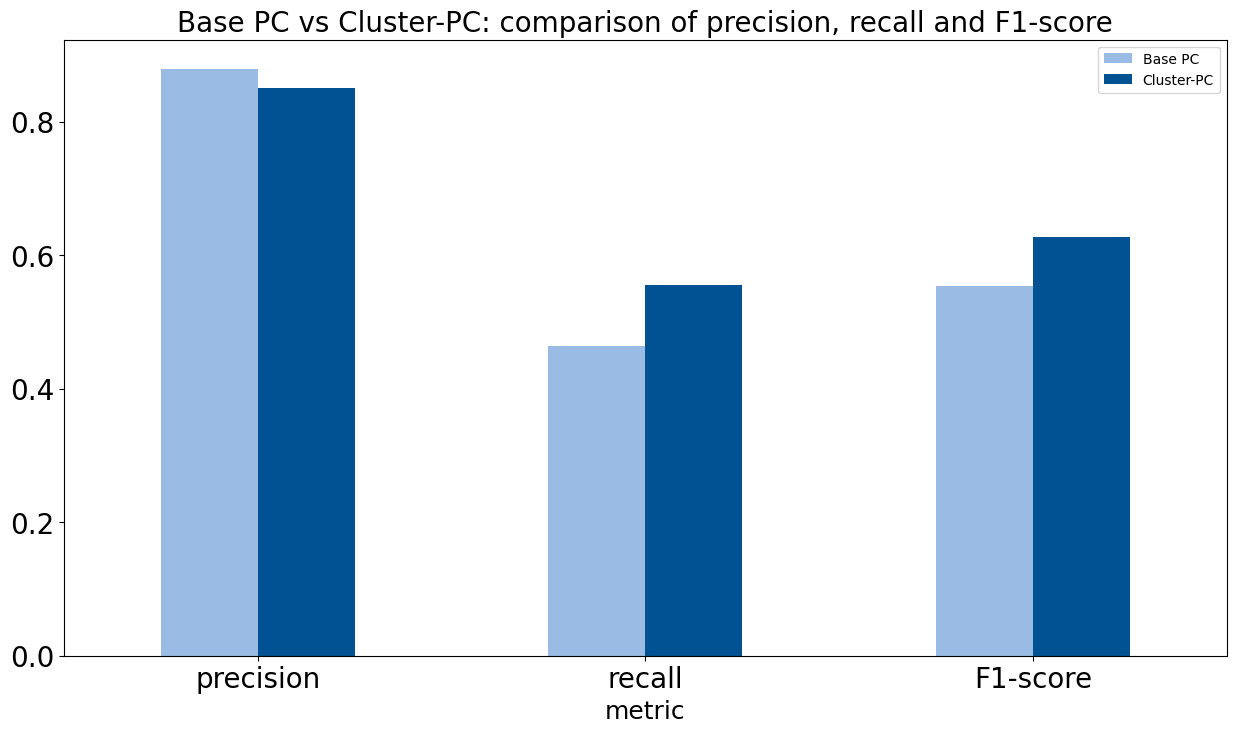

In [22]:
mean_values = data_all[prec_recall_metrics].mean()

# Group data into a new DataFrame
grouped_data = pd.DataFrame({
    'Base PC': [mean_values['base_adj_precision'],mean_values['base_adj_recall'], mean_values['base_adj_f1_score']],
    'Cluster-PC': [mean_values['cluster_adj_precision'], mean_values['cluster_adj_recall'], mean_values['cluster_adj_f1_score']],
})

# Set the index to the group names
grouped_data.index = ['precision', 'recall', 'F1-score' ]

# Plot the data
# colors = ['#A4C2F4', '#3333FF', '#64d2a6', '#065535', '#e49645', '#b45f06']
# colors = ['#64a0c8', '#005293', '#64d2a6', '#065535', '#e49645', '#b45f06']
# colors = ['#A4C2F4', '#3333FF', '#4D68D5']
colors = ['#9ABCE4', '#005293', '#5E94D4']
ax = grouped_data.plot(kind='bar', figsize=(15, 8), color=colors[:2])

# Customizing the plot
plt.title('Base PC vs Cluster-PC: comparison of precision, recall and F1-score', fontsize=20)
plt.xlabel('metric', fontsize=18)
plt.xticks(rotation=0)
plt.tick_params(axis='both', which='major', labelsize=20)

# Show the plot
plt.show()

In [23]:
data_nonadj_clusters[prec_recall_metrics].describe()

,base_adj_precision,cluster_adj_precision,base_adj_recall,cluster_adj_recall,base_adj_f1_score,cluster_adj_f1_score
count,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,0.855379,0.801484,0.618753,0.720603,0.681248,0.733210
std,0.130245,0.146020,0.248258,0.193253,0.189993,0.135662
min,0.176471,0.142857,0.102564,0.280000,0.179775,0.250000
25%,0.791667,0.733333,0.400000,0.555556,0.530612,0.633333
50%,0.875000,0.828571,0.650000,0.750000,0.716981,0.740741
75%,0.947368,0.903226,0.833333,0.888889,0.840000,0.840000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
# latex = data_nonadj_clusters[prec_recall_metrics].describe().style.to_latex()
# print(latex)

C-PC has slightly lower true negative and higher true positive. Positive is defined as an edge that is present in the true graph. 

In [25]:
count_metrics_with_pruned = ['base_adj_false_negative', 'pruned_base_adj_false_negative', 'cluster_adj_false_negative', \
                 'base_adj_false_positive', 'pruned_base_adj_false_positive','cluster_adj_false_positive', \
                    'base_adj_true_negative', 'pruned_base_adj_true_negative', 'cluster_adj_true_negative', \
                        'base_adj_true_positive', 'pruned_base_adj_true_positive', 'cluster_adj_true_positive']
count_metrics = ['base_adj_false_negative', 'cluster_adj_false_negative', \
                    'base_adj_false_positive','cluster_adj_false_positive', \
                        'base_adj_true_negative', 'cluster_adj_true_negative', \
                            'base_adj_true_positive', 'cluster_adj_true_positive']
data[count_metrics].describe()

,base_adj_false_negative,cluster_adj_false_negative,base_adj_false_positive,cluster_adj_false_positive,base_adj_true_negative,cluster_adj_true_negative,base_adj_true_positive,cluster_adj_true_positive
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,36.842000,30.000667,2.520667,4.331333,48.716000,46.905333,16.921333,23.762667
std,31.246844,26.446278,2.886369,4.399067,31.898135,31.376478,4.168941,8.696173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000
25%,8.000000,6.000000,0.000000,0.000000,25.000000,23.000000,14.000000,18.000000
50%,29.000000,23.000000,2.000000,3.000000,54.000000,52.000000,17.000000,23.000000
75%,61.000000,51.000000,4.000000,7.000000,77.000000,75.000000,19.000000,29.000000
max,96.000000,93.000000,28.000000,36.000000,99.000000,99.000000,32.000000,52.000000


Calculating the total of correctly identified edges ratio: $TCIE = \frac{TP + TN}{TP + TN + FP + FN}$. 

In total C-PC has slightly higher TCIE. 

In [26]:
data['cluster_TCIE'] = (data['cluster_adj_true_positive'] + 
                data['cluster_adj_true_negative']) / (data['cluster_adj_true_positive'] + 
                                                                                        data['cluster_adj_true_negative'] + 
                                                                                        data['cluster_adj_false_positive'] + 
                                                                                        data['cluster_adj_false_negative'])
data['base_TCIE'] = (data['base_adj_true_positive'] +
                data['base_adj_true_negative']) / (data['base_adj_true_positive'] + 
                                                                                        data['base_adj_true_negative'] + 
                                                                                        data['base_adj_false_positive'] + 
                                                                                        data['base_adj_false_negative'])
data[['base_TCIE', 'cluster_TCIE']].describe()

,base_TCIE,cluster_TCIE
count,1500.000000,1500.000000
mean,0.625117,0.673029
std,0.289173,0.238279
min,0.085714,0.114286
25%,0.390476,0.466667
50%,0.685714,0.723810
75%,0.895238,0.885714
max,1.000000,1.000000


All in all one can say that C-PC removes slightly less edges than PC. It doesn't remove as many edges that shouldn't be removed, but also keeps more edges that should be removed. 

C-PC has a slightly lower SHD. If one was to calculate the SID, it would show a similar trend to the SHD. 

In [27]:
dist_metrics_with_pruned = ['base_base_shd', 'pruned_base_pruned_base_shd', 'cluster_cluster_shd', 'empty_graph_shd']#, \
         #   'base_sid_lower', 'base_sid_upper', 'pruned_base_sid_lower', 'pruned_base_sid_upper', \
         #      'cluster_sid_lower', 'cluster_sid_upper']
dist_metrics = ['base_base_shd', 'cluster_cluster_shd', 'empty_graph_shd']#, \
            #   'base_sid_lower', 'base_sid_upper \
            #      'cluster_sid_lower', 'cluster_sid_upper']
data[dist_metrics].describe()

,base_base_shd,cluster_cluster_shd,empty_graph_shd
count,1500.000000,1500.000000,1500.000000
mean,44.805333,37.064667,53.763333
std,32.225783,26.785969,32.800435
min,0.000000,0.000000,6.000000
25%,15.000000,13.000000,26.000000
50%,39.000000,32.000000,47.000000
75%,70.000000,60.000000,77.000000
max,101.000000,97.000000,105.000000


This is the edge density, intra_cluster is number_edges_within_cluster/number_possible_edges_within_cluster, 

inter_cluster is number_edges_between_connected_clusters/number_possible_edges_between_connected_clusters and

inter_including_disconnected_cluster is number_edges_between_all_clusters/number_possible_edges_between_all_clusters.

This means inter_including_disconnected_cluster also has edges between disconnected clusters in the denominator (and is therefore slightly lower).

In [28]:
edge_ratios = data['edge_ratios'].apply(pd.Series)
edge_ratios.columns = ['intra_cluster', 'inter_cluster', 'inter_including_disconnected_cluster']
mean_values = edge_ratios.mean()
mean_values = pd.DataFrame([mean_values])
print('Edge Ratios \n', mean_values)

Edge Ratios 
    intra_cluster  inter_cluster  inter_including_disconnected_cluster
0       0.487773        0.56458                              0.517693


### Grouping by clusters

In [29]:
data_all.groupby('n_clusters')[prec_recall_metrics].mean()

,base_adj_precision,cluster_adj_precision,base_adj_recall,cluster_adj_recall,base_adj_f1_score,cluster_adj_f1_score
n_clusters,,,,,,
1.0,0.873859,0.873859,0.467887,0.467887,0.552960,0.552960
2.0,0.873706,0.857586,0.463733,0.507810,0.551055,0.586960
3.0,0.869332,0.838528,0.463910,0.544516,0.548442,0.613097
4.0,0.876981,0.840817,0.463368,0.564293,0.550572,0.631132
5.0,0.874411,0.842530,0.459140,0.582581,0.547965,0.650559
6.0,0.883543,0.843839,0.463424,0.597262,0.555450,0.663910
7.0,0.900778,0.860855,0.471772,0.622757,0.566243,0.688039


In [30]:
print(data_all.groupby('n_clusters')[prec_recall_metrics].mean().to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &  base\_adj\_precision &  cluster\_adj\_precision &  base\_adj\_recall &  cluster\_adj\_recall &  base\_adj\_f1\_score &  cluster\_adj\_f1\_score \\
n\_clusters &                     &                        &                  &                     &                    &                       \\
\midrule
1.0        &            0.873859 &               0.873859 &         0.467887 &            0.467887 &           0.552960 &              0.552960 \\
2.0        &            0.873706 &               0.857586 &         0.463733 &            0.507810 &           0.551055 &              0.586960 \\
3.0        &            0.869332 &               0.838528 &         0.463910 &            0.544516 &           0.548442 &              0.613097 \\
4.0        &            0.876981 &               0.840817 &         0.463368 &            0.564293 &           0.550572 &              0.631132 \\
5.0        &            0.874411 &               0.842530 &         

In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.


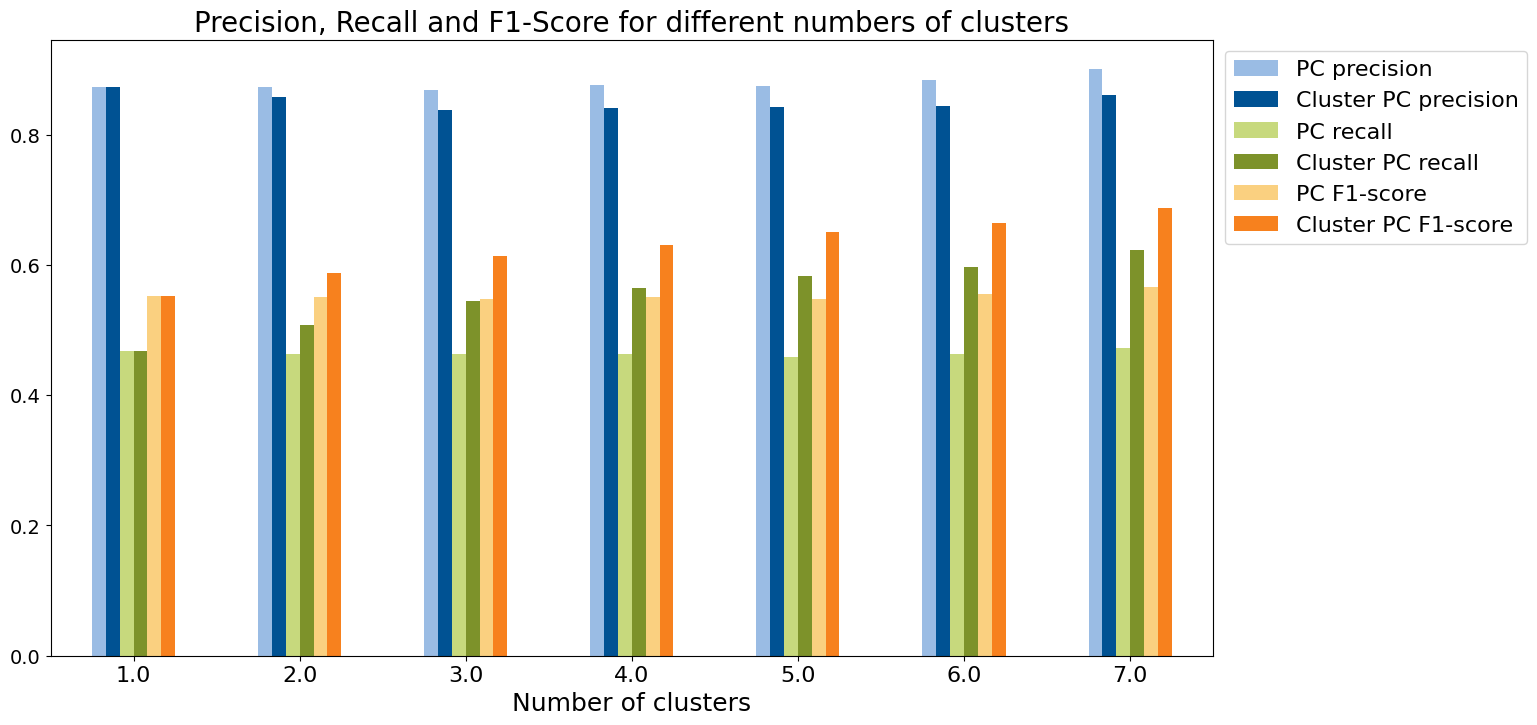

In [31]:
# colors = ['#A4C2F4', '#3333FF', '#64d2a6', '#065535', '#e49645', '#b45f06']
# colors = ['#A4C2F4', '#3333FF', '#64d2a6', '#065535', '#e49645', '#b45f06']
colors = ['#9ABCE4', '#005293', '#C7D97D', '#7D922A', '#FAD080', '#F7811E'] #TUM COLORS
# colors = ['#64a0c8', '#005293', '#8F81EA', '#6955E2', '#FAD080', '#F7811E']
data_all.groupby('n_clusters')[prec_recall_metrics].mean().plot(kind='bar', figsize=(15, 8), color = colors)
plt.title('Precision, Recall and F1-Score for different numbers of clusters', fontsize = 20)
plt.xlabel('Number of clusters', fontsize=18)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.tick_params(axis = 'x', which = 'major', labelsize = 16, rotation = 0)
label_names = ['PC precision', 'Cluster PC precision', 'PC recall', 'Cluster PC recall', 'PC F1-score', 'Cluster PC F1-score']
plt.legend(label_names,  bbox_to_anchor = (1.28, 1),  fontsize=16, loc='upper right')
# prec_recall_clusters_diagram.pdf
plt.savefig('imgs/prec_recall_clusters_diagram.pdf', bbox_inches='tight')

In [32]:
# # colors = ['#A4C2F4', '#3333FF', '#64d2a6', '#065535', '#e49645', '#b45f06']
# colors = ['#9ABCE4', '#005293', '#C7D97D', '#7D922A', '#FAD080', '#F7811E'] #TUM COLORS
# data_nonadj_clusters.groupby('n_clusters').mean()[prec_recall_metrics].plot(kind='bar', figsize=(15, 8), color = colors)
# plt.title('Precision, Recall and F1-Score for different numbers of clusters for not fully connected C-DAGs', fontsize = 20)
# plt.xlabel('Number of clusters', fontsize=18)
# plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
# plt.tick_params(axis = 'x', which = 'major', labelsize = 16, rotation = 0)
# label_names = ['PC precision', 'Cluster PC precision', 'PC recall', 'Cluster PC recall', 'PC F1-score', 'Cluster PC F1-score']
# plt.legend(label_names,  bbox_to_anchor = (1.3, 1),  fontsize=16, loc='upper right')

In [33]:
data_all.groupby('n_clusters')[dist_metrics].mean()

,base_base_shd,cluster_cluster_shd,empty_graph_shd
n_clusters,,,
1.0,45.060,45.060,53.812
2.0,45.100,41.996,54.076
3.0,45.128,39.664,53.860
4.0,45.032,37.608,53.672
5.0,45.292,36.108,53.864
6.0,44.284,34.464,53.680
7.0,43.996,32.548,53.428


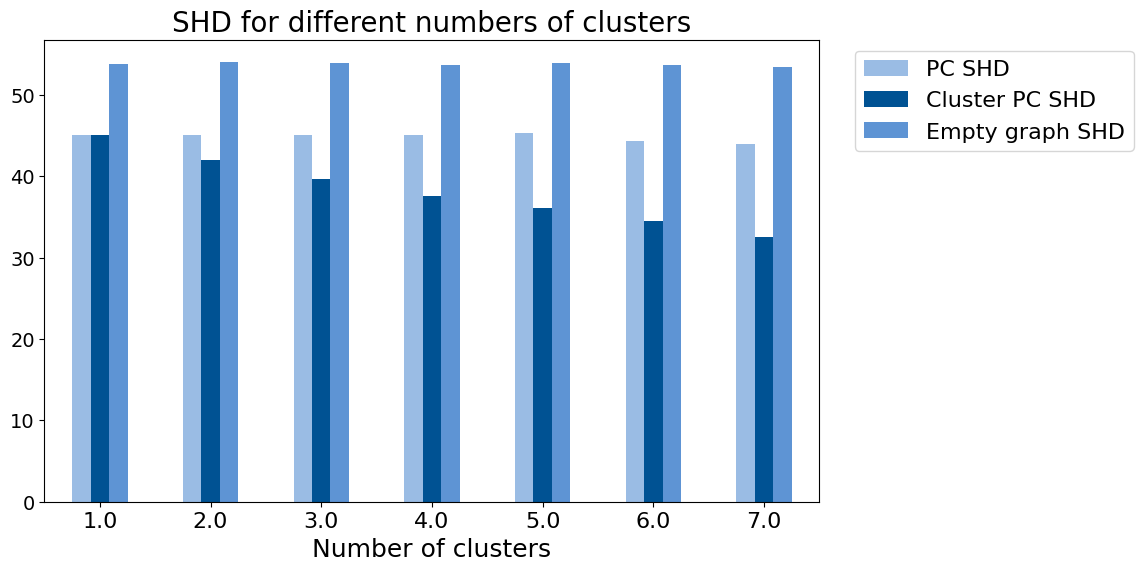

In [34]:
# colors = ['#A4C2F4', '#3333FF', '#4D68D5']
colors = ['#9ABCE4', '#005293', '#5E94D4']
data_all.groupby('n_clusters')[dist_metrics].mean().plot(kind='bar', figsize=(10, 6), color = colors)
plt.title('SHD for different numbers of clusters', fontsize = 20)
plt.xlabel('Number of clusters', fontsize=18)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.tick_params(axis = 'x', which = 'major', labelsize = 16, rotation = 0)
label_names = ['PC SHD', 'Cluster PC SHD', 'Empty graph SHD']
plt.legend(label_names, bbox_to_anchor = (1.42, 1),  fontsize=16, loc='upper right')

In [35]:
data_nonadj_clusters.groupby('n_clusters')[dist_metrics].mean()

,base_base_shd,cluster_cluster_shd,empty_graph_shd
n_clusters,,,
3.0,16.621622,15.540541,24.324324
4.0,19.227723,17.425743,27.029703
5.0,22.221429,18.007143,30.292857
6.0,24.718750,19.987500,33.843750
7.0,29.874346,22.047120,38.790576


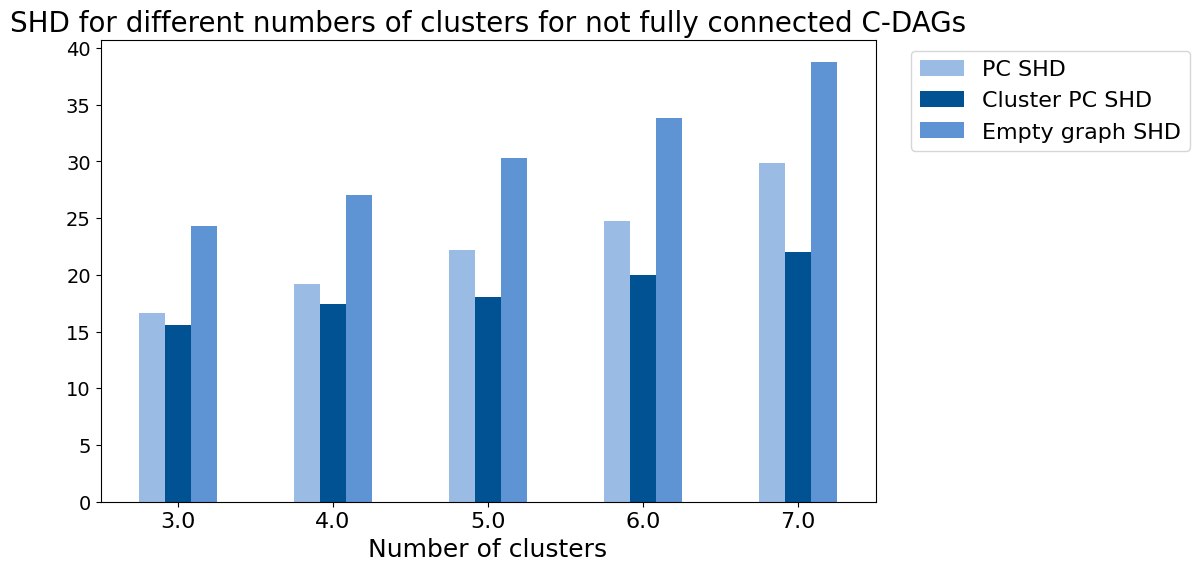

In [36]:
# colors = ['#A4C2F4', '#3333FF', '#4D68D5']
colors = ['#9ABCE4', '#005293', '#5E94D4']
data_nonadj_clusters.groupby('n_clusters')[dist_metrics].mean().plot(kind='bar', figsize=(10, 6), color = colors)
plt.title('SHD for different numbers of clusters for not fully connected C-DAGs', fontsize = 20)
plt.xlabel('Number of clusters', fontsize=18)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.tick_params(axis = 'x', which = 'major', labelsize = 16, rotation = 0)
label_names = ['PC SHD', 'Cluster PC SHD', 'Empty graph SHD']
plt.legend(label_names, bbox_to_anchor = (1.42, 1),  fontsize=16, loc='upper right')

Goes up as less C-DAGs are fully connected at 5,6 or 7 clusters

In [37]:
indep_test_metrics = ['Base indep tests', 'C-PC indep tests']
data_all.groupby('n_clusters')[indep_test_metrics].mean()

,Base indep tests,C-PC indep tests
n_clusters,,
1.0,4985.484,4985.484
2.0,5021.704,3854.712
3.0,4974.088,3140.348
4.0,5056.860,2781.332
5.0,4992.824,2435.812
6.0,4922.968,2200.856
7.0,4913.820,2038.760


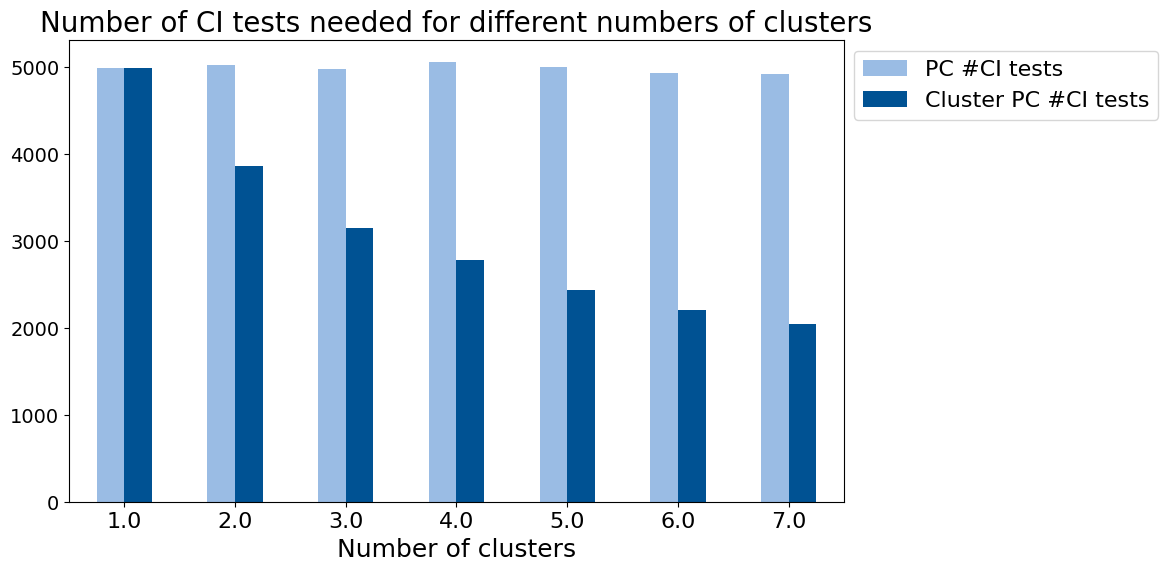

In [38]:
# colors = ['#A4C2F4', '#3333FF', '#4D68D5']
colors = ['#9ABCE4', '#005293', '#5E94D4']
data_all.groupby('n_clusters')[indep_test_metrics].mean().plot(kind='bar', figsize=(10, 6), color = colors)
plt.title('Number of CI tests needed for different numbers of clusters', fontsize = 20)
plt.xlabel('Number of clusters', fontsize=18)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.tick_params(axis = 'x', which = 'major', labelsize = 16, rotation = 0)
label_names = ['PC #CI tests', 'Cluster PC #CI tests']
plt.legend(label_names, bbox_to_anchor = (1.42, 1),  fontsize=16, loc='upper right')
plt.savefig('imgs/ci_tests_clusters_diagram.pdf', bbox_inches='tight')

### Grouping by alpha

In [39]:
data.groupby('alpha')[prec_recall_metrics].mean()

,base_adj_precision,cluster_adj_precision,base_adj_recall,cluster_adj_recall,base_adj_f1_score,cluster_adj_f1_score
alpha,,,,,,
0.01,0.927705,0.913809,0.419237,0.517688,0.531467,0.630013
0.05,0.914228,0.891478,0.441153,0.547143,0.547230,0.644641
0.10,0.898180,0.872393,0.466170,0.572885,0.563608,0.656502
0.25,0.856166,0.813571,0.480944,0.587032,0.559977,0.637702
0.50,0.802681,0.745544,0.513620,0.624601,0.564157,0.625890


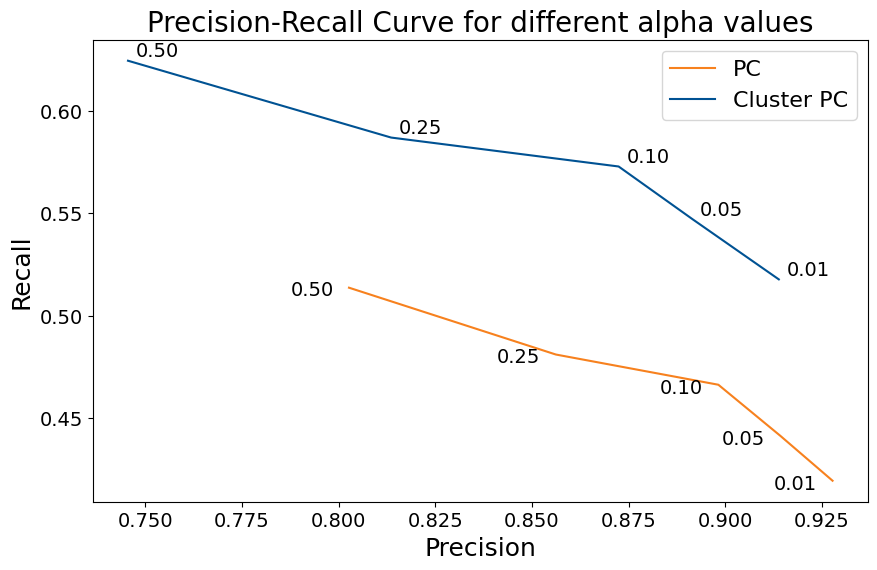

In [40]:
import matplotlib.pyplot as plt

# Calculate the mean values for the precision-recall metrics grouped by 'alpha'
grouped_data = data.groupby('alpha')[prec_recall_metrics].mean()

fig, ax = plt.subplots(figsize=(10, 6))

# Plot for PC
ax.plot(grouped_data['base_adj_precision'], grouped_data['base_adj_recall'], color='#F7811E', label='PC')
# Annotate alpha values for PC
for alpha, x, y in zip(grouped_data.index, grouped_data['base_adj_precision'], grouped_data['base_adj_recall']):
    offset = 0.004
    ax.text(x - offset, y - offset, f'{alpha:.2f}', fontsize=14, ha='right')

# Plot for Cluster PC
ax.plot(grouped_data['cluster_adj_precision'], grouped_data['cluster_adj_recall'], color='#005293', label='Cluster PC')
# Annotate alpha values for Cluster PC
for alpha, x, y in zip(grouped_data.index, grouped_data['cluster_adj_precision'], grouped_data['cluster_adj_recall']):
    offset = 0.002
    ax.text(x + offset, y + offset, f'{alpha:.2f}', fontsize=14, ha='left')

# Set title and labels
ax.set_title('Precision-Recall Curve for different alpha values', fontsize=20)
ax.set_xlabel('Precision', fontsize=18)
ax.set_ylabel('Recall', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=14)

# Display legend
ax.legend(fontsize=16)
plt.savefig('imgs/prec_recall_alpha_curve.pdf', format='pdf')
plt.show()


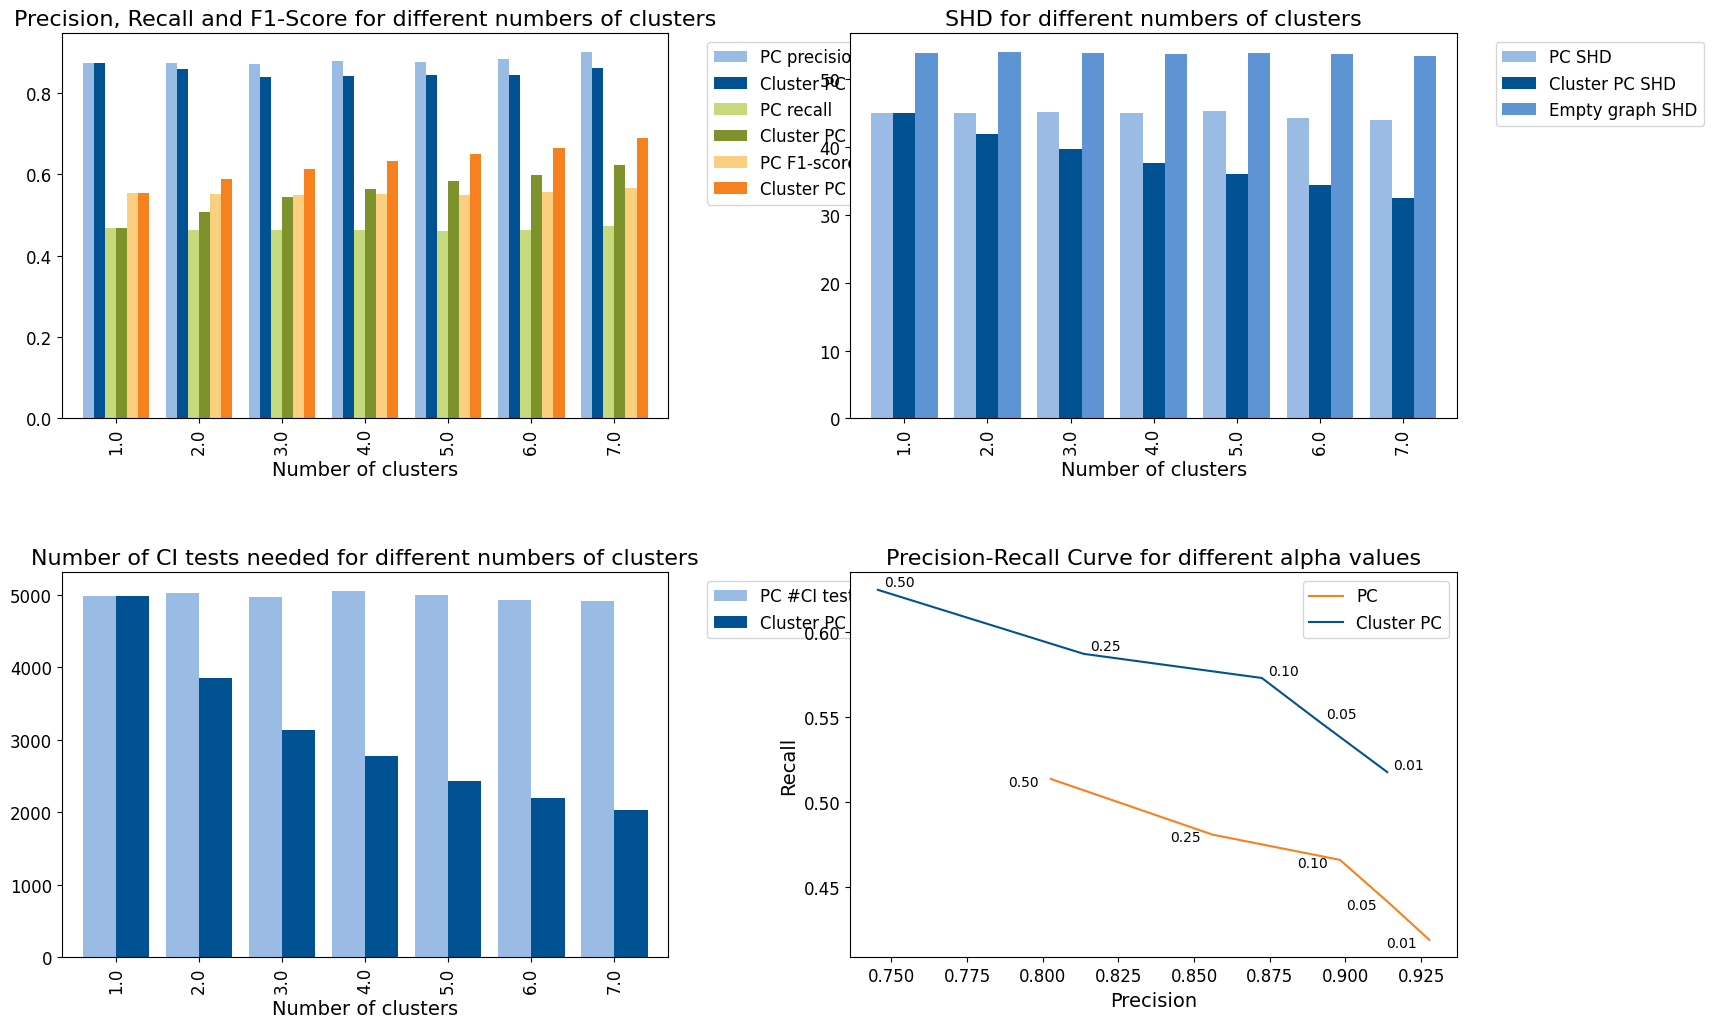

In [41]:
# combined seaborn plot
import matplotlib.pyplot as plt
import seaborn as sns

# Define the color palette
colors_prec_recall = ['#9ABCE4', '#005293', '#C7D97D', '#7D922A', '#FAD080', '#F7811E']
colors_shd = ['#9ABCE4', '#005293', '#5E94D4']
colors_ci_tests = ['#9ABCE4', '#005293']

# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Plot 1: Precision, Recall, and F1-Score for different numbers of clusters
data_all.groupby('n_clusters')[prec_recall_metrics].mean().plot(
    kind='bar', ax=axes[0, 0], color=colors_prec_recall, width=0.8)
axes[0, 0].set_title('Precision, Recall and F1-Score for different numbers of clusters', fontsize=16)
axes[0, 0].set_xlabel('Number of clusters', fontsize=14)
axes[0, 0].tick_params(axis='both', labelsize=12)
axes[0, 0].legend(
    ['PC precision', 'Cluster PC precision', 'PC recall', 'Cluster PC recall', 'PC F1-score', 'Cluster PC F1-score'],
    bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

# Plot 2: SHD for different numbers of clusters
data_all.groupby('n_clusters')[dist_metrics].mean().plot(
    kind='bar', ax=axes[0, 1], color=colors_shd, width=0.8)
axes[0, 1].set_title('SHD for different numbers of clusters', fontsize=16)
axes[0, 1].set_xlabel('Number of clusters', fontsize=14)
axes[0, 1].tick_params(axis='both', labelsize=12)
axes[0, 1].legend(['PC SHD', 'Cluster PC SHD', 'Empty graph SHD'], bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

# Plot 3: Number of CI tests needed for different numbers of clusters
data_all.groupby('n_clusters')[indep_test_metrics].mean().plot(
    kind='bar', ax=axes[1, 0], color=colors_ci_tests, width=0.8)
axes[1, 0].set_title('Number of CI tests needed for different numbers of clusters', fontsize=16)
axes[1, 0].set_xlabel('Number of clusters', fontsize=14)
axes[1, 0].tick_params(axis='both', labelsize=12)
axes[1, 0].legend(['PC #CI tests', 'Cluster PC #CI tests'], bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

# Plot 4: Precision-Recall Curve for different alpha values
grouped_data = data.groupby('alpha')[prec_recall_metrics].mean()
axes[1, 1].plot(grouped_data['base_adj_precision'], grouped_data['base_adj_recall'], color='#F7811E', label='PC')
axes[1, 1].plot(grouped_data['cluster_adj_precision'], grouped_data['cluster_adj_recall'], color='#005293', label='Cluster PC')

# Annotate alpha values on the plot
for alpha, x, y in zip(grouped_data.index, grouped_data['base_adj_precision'], grouped_data['base_adj_recall']):
    axes[1, 1].text(x - 0.004, y - 0.004, f'{alpha:.2f}', fontsize=10, ha='right')
for alpha, x, y in zip(grouped_data.index, grouped_data['cluster_adj_precision'], grouped_data['cluster_adj_recall']):
    axes[1, 1].text(x + 0.002, y + 0.002, f'{alpha:.2f}', fontsize=10, ha='left')

axes[1, 1].set_title('Precision-Recall Curve for different alpha values', fontsize=16)
axes[1, 1].set_xlabel('Precision', fontsize=14)
axes[1, 1].set_ylabel('Recall', fontsize=14)
axes[1, 1].tick_params(axis='both', labelsize=12)
axes[1, 1].legend(fontsize=12)

# Save the combined figure
plt.savefig('combined_plots.pdf', bbox_inches='tight')
plt.show()


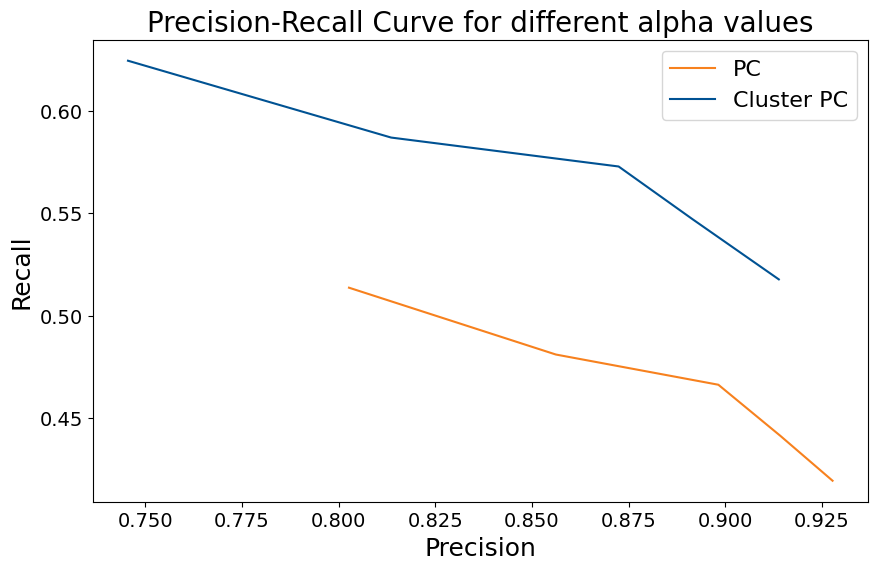

In [42]:
fig, ax = plt.subplots(figsize=(10, 6))
# colors = ['#9ABCE4', '#005293', '#C7D97D', '#7D922A', '#FAD080', '#F7811E'] #TUM COLORS
ax.plot(data.groupby('alpha')['base_adj_precision'].mean(), data.groupby('alpha')['base_adj_recall'].mean(), color = '#F7811E')
ax.plot(data.groupby('alpha')['cluster_adj_precision'].mean(), data.groupby('alpha')['cluster_adj_recall'].mean(), color = '#005293')
ax.set_title('Precision-Recall Curve for different alpha values', fontsize = 20)
ax.set_xlabel('Precision', fontsize=18)
ax.set_ylabel('Recall', fontsize=18)
ax.tick_params(axis = 'both', which = 'major', labelsize = 14)
ax.legend(['PC', 'Cluster PC'], fontsize=16)

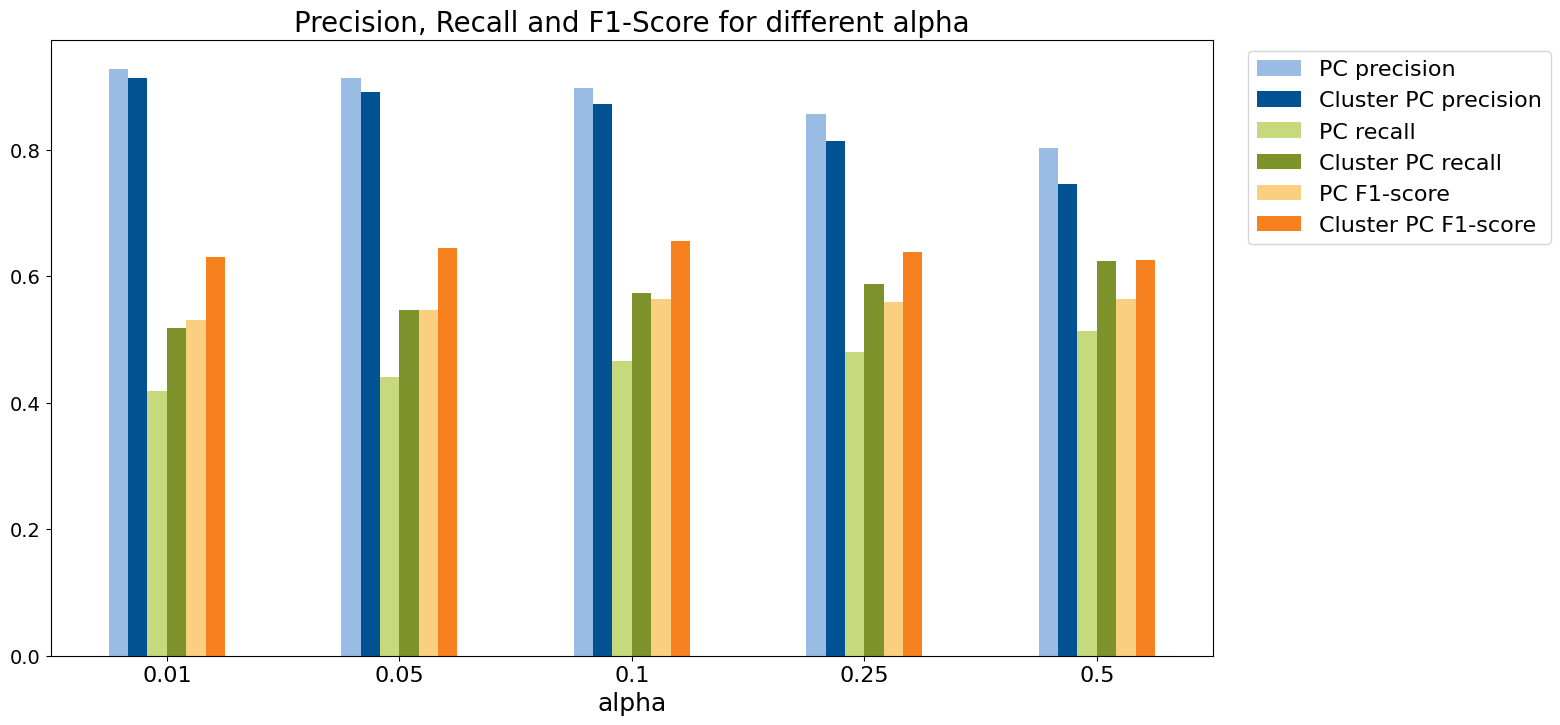

In [43]:
# colors = ['#A4C2F4', '#3333FF', '#64d2a6', '#065535', '#e49645', '#b45f06']
colors = ['#9ABCE4', '#005293', '#C7D97D', '#7D922A', '#FAD080', '#F7811E'] #TUM COLORS
data.groupby('alpha')[prec_recall_metrics].mean().plot(kind='bar', figsize=(15, 8), color = colors)
plt.title('Precision, Recall and F1-Score for different alpha', fontsize = 20)
plt.xlabel('alpha', fontsize=18)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.tick_params(axis = 'x', which = 'major', labelsize = 16, rotation = 0)
label_names = ['PC precision', 'Cluster PC precision', 'PC recall', 'Cluster PC recall', 'PC F1-score', 'Cluster PC F1-score']
plt.legend(label_names, bbox_to_anchor = (1.3, 1),  fontsize=16, loc='upper right')

In [44]:
data.groupby('alpha')[dist_metrics].mean()

,base_base_shd,cluster_cluster_shd,empty_graph_shd
alpha,,,
0.01,44.480000,37.470000,53.833333
0.05,44.210000,36.573333,53.830000
0.10,43.900000,35.703333,53.473333
0.25,45.313333,37.456667,54.060000
0.50,46.123333,38.120000,53.620000


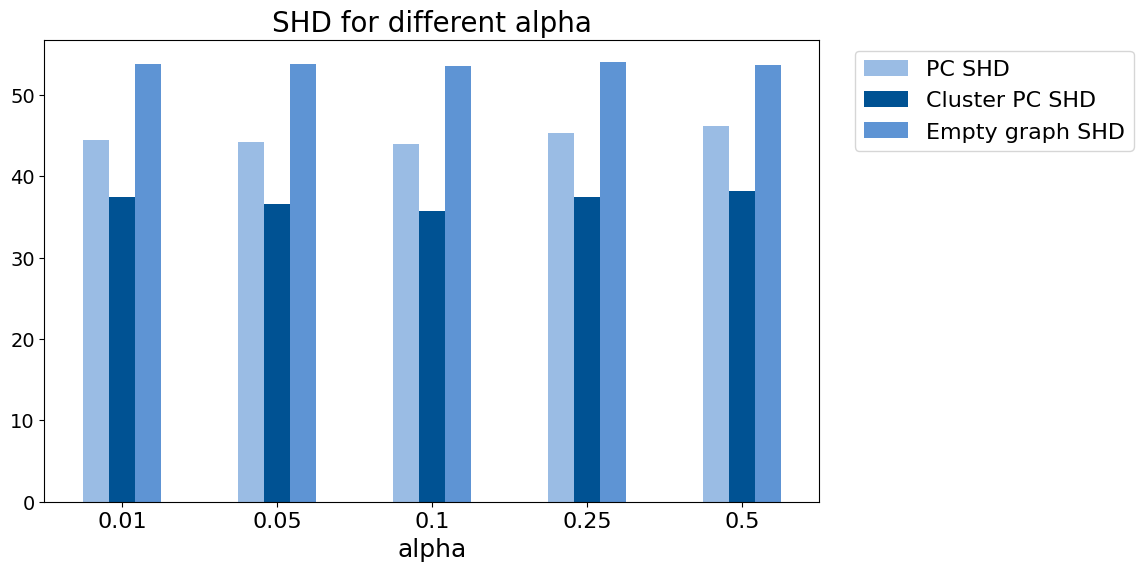

In [45]:
# colors = ['#A4C2F4', '#3333FF', '#4D68D5']
colors = ['#9ABCE4', '#005293', '#5E94D4']
data.groupby('alpha')[dist_metrics].mean().plot(kind='bar', figsize=(10, 6), color = colors)
plt.title('SHD for different alpha', fontsize = 20)
plt.xlabel('alpha', fontsize=18)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.tick_params(axis = 'x', which = 'major', labelsize = 16, rotation = 0)
label_names = ['PC SHD', 'Cluster PC SHD', 'Empty graph SHD']
plt.legend(label_names, bbox_to_anchor = (1.42, 1),  fontsize=16, loc='upper right')

### Grouping by distribution type


In [46]:
data.groupby('distribution_type')[prec_recall_metrics].mean()

,base_adj_precision,cluster_adj_precision,base_adj_recall,cluster_adj_recall,base_adj_f1_score,cluster_adj_f1_score
distribution_type,,,,,,
gauss,0.879792,0.847359,0.464224,0.56987,0.553288,0.63895


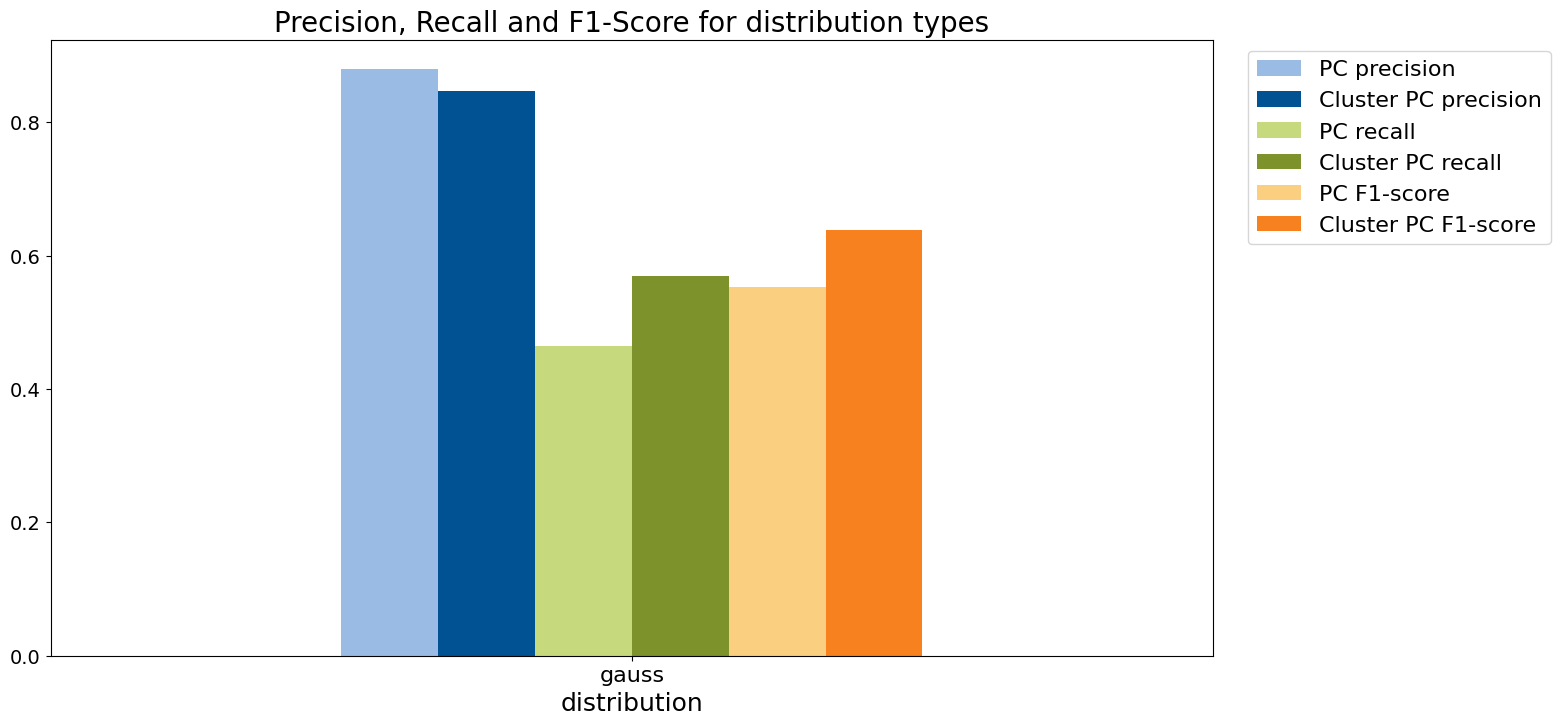

In [47]:
# colors = ['#A4C2F4', '#3333FF', '#64d2a6', '#065535', '#e49645', '#b45f06']
colors = ['#9ABCE4', '#005293', '#C7D97D', '#7D922A', '#FAD080', '#F7811E'] #TUM COLORS
data.groupby('distribution_type')[prec_recall_metrics].mean().plot(kind='bar', figsize=(15, 8), color = colors)
plt.title('Precision, Recall and F1-Score for distribution types', fontsize = 20)
plt.xlabel('distribution', fontsize=18)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.tick_params(axis = 'x', which = 'major', labelsize = 16, rotation = 0)
label_names = ['PC precision', 'Cluster PC precision', 'PC recall', 'Cluster PC recall', 'PC F1-score', 'Cluster PC F1-score']
plt.legend(label_names, bbox_to_anchor = (1.3, 1),  fontsize=16, loc='upper right')

In [48]:
data.groupby('distribution_type')[dist_metrics].mean()

,base_base_shd,cluster_cluster_shd,empty_graph_shd
distribution_type,,,
gauss,44.805333,37.064667,53.763333


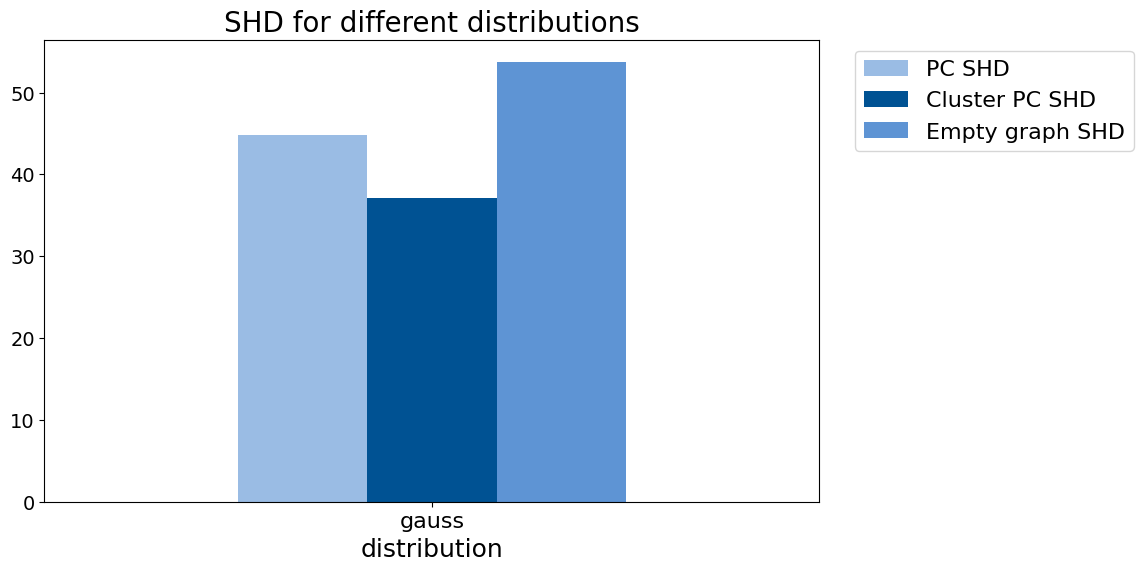

In [49]:
# colors = ['#A4C2F4', '#3333FF', '#4D68D5']
colors = ['#9ABCE4', '#005293', '#5E94D4']
data.groupby('distribution_type')[dist_metrics].mean().plot(kind='bar', figsize=(10, 6), color = colors)
plt.title('SHD for different distributions', fontsize = 20)
plt.xlabel('distribution', fontsize=18)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.tick_params(axis = 'x', which = 'major', labelsize = 16, rotation = 0)
label_names = ['PC SHD', 'Cluster PC SHD', 'Empty graph SHD']
plt.legend(label_names, bbox_to_anchor = (1.42, 1),  fontsize=16, loc='upper right')

### Grouping by DAG method

In [50]:
data.groupby('dag_method')[prec_recall_metrics].mean()

,base_adj_precision,cluster_adj_precision,base_adj_recall,cluster_adj_recall,base_adj_f1_score,cluster_adj_f1_score
dag_method,,,,,,
erdos_renyi,0.879792,0.847359,0.464224,0.56987,0.553288,0.63895


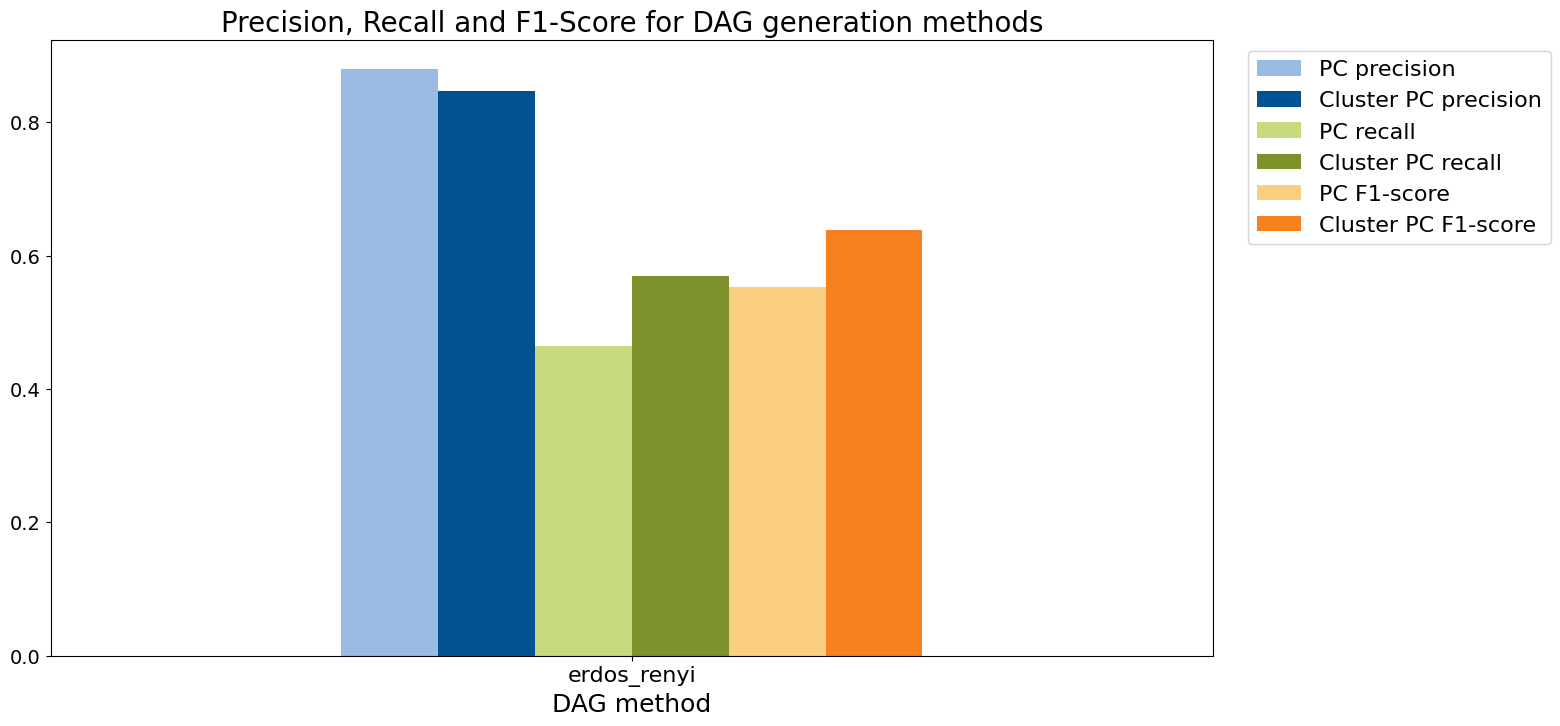

In [51]:
# colors = ['#A4C2F4', '#3333FF', '#64d2a6', '#065535', '#e49645', '#b45f06']
colors = ['#9ABCE4', '#005293', '#C7D97D', '#7D922A', '#FAD080', '#F7811E'] #TUM COLORS
data.groupby('dag_method')[prec_recall_metrics].mean().plot(kind='bar', figsize=(15, 8), color = colors)
plt.title('Precision, Recall and F1-Score for DAG generation methods', fontsize = 20)
plt.xlabel('DAG method', fontsize=18)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.tick_params(axis = 'x', which = 'major', labelsize = 16, rotation = 0)
label_names = ['PC precision', 'Cluster PC precision', 'PC recall', 'Cluster PC recall', 'PC F1-score', 'Cluster PC F1-score']
plt.legend(label_names, bbox_to_anchor = (1.3, 1),  fontsize=16, loc='upper right')

In [52]:
data.groupby('dag_method')[dist_metrics].mean()

,base_base_shd,cluster_cluster_shd,empty_graph_shd
dag_method,,,
erdos_renyi,44.805333,37.064667,53.763333


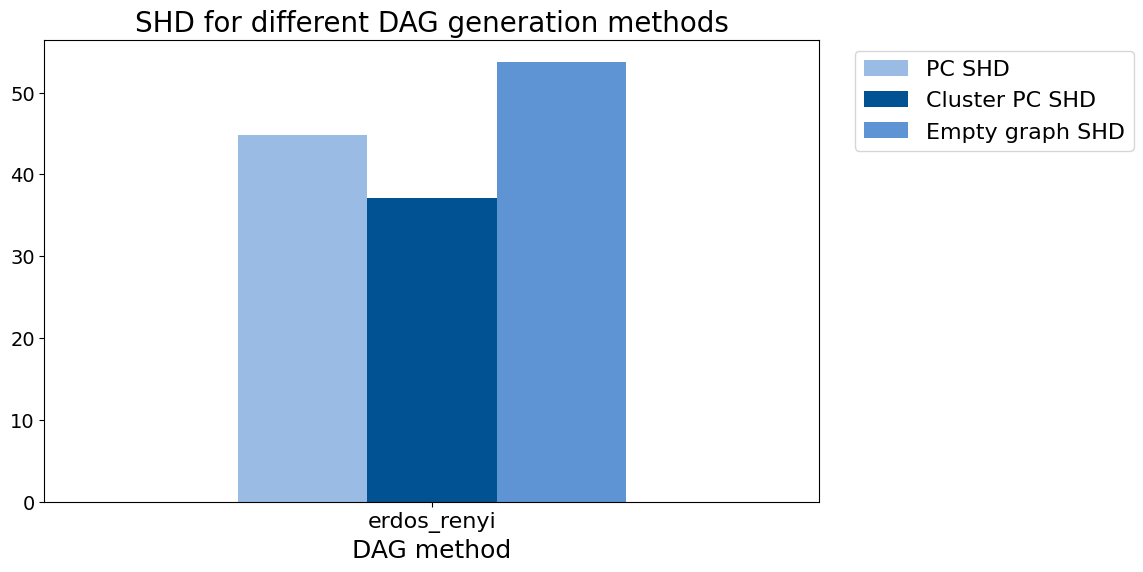

In [53]:
# colors = ['#A4C2F4', '#3333FF', '#4D68D5']
colors = ['#9ABCE4', '#005293', '#5E94D4']
data.groupby('dag_method')[dist_metrics].mean().plot(kind='bar', figsize=(10, 6), color = colors)
plt.title('SHD for different DAG generation methods', fontsize = 20)
plt.xlabel('DAG method', fontsize=18)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.tick_params(axis = 'x', which = 'major', labelsize = 16, rotation = 0)
label_names = ['PC SHD', 'Cluster PC SHD', 'Empty graph SHD']
plt.legend(label_names, bbox_to_anchor = (1.42, 1),  fontsize=16, loc='upper right')

### Grouping by #edges

In [54]:
data.groupby('n_edges')[prec_recall_metrics].mean()

,base_adj_precision,cluster_adj_precision,base_adj_recall,cluster_adj_recall,base_adj_f1_score,cluster_adj_f1_score
n_edges,,,,,,
15.0,0.830497,0.767985,0.880382,0.906289,0.838203,0.810945
30.0,0.880471,0.822989,0.637304,0.725865,0.733912,0.764065
50.0,0.831338,0.801376,0.386467,0.523846,0.522394,0.627265
80.0,0.856654,0.844445,0.232207,0.370651,0.362441,0.509461
150.0,1.000000,1.000000,0.184762,0.322698,0.309491,0.483012


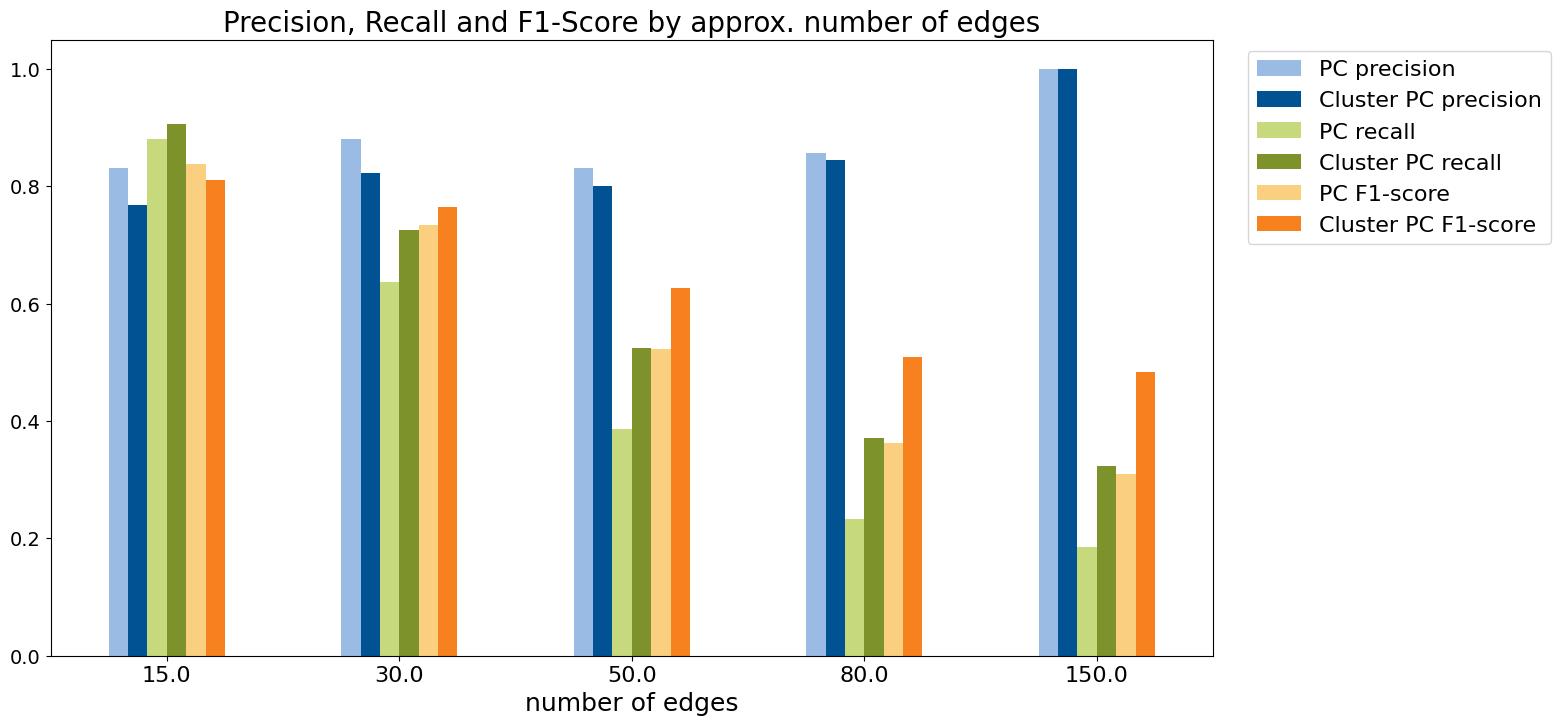

In [55]:
# colors = ['#A4C2F4', '#3333FF', '#64d2a6', '#065535', '#e49645', '#b45f06']
colors = ['#9ABCE4', '#005293', '#C7D97D', '#7D922A', '#FAD080', '#F7811E'] #TUM COLORS
data.groupby('n_edges')[prec_recall_metrics].mean().plot(kind='bar', figsize=(15, 8), color = colors)
plt.title('Precision, Recall and F1-Score by approx. number of edges', fontsize = 20)
plt.xlabel('number of edges', fontsize=18)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.tick_params(axis = 'x', which = 'major', labelsize = 16, rotation = 0)
label_names = ['PC precision', 'Cluster PC precision', 'PC recall', 'Cluster PC recall', 'PC F1-score', 'Cluster PC F1-score']
plt.legend(label_names, bbox_to_anchor = (1.3, 1),  fontsize=16, loc='upper right')

In [56]:
data.groupby('n_edges')[dist_metrics].mean()

,base_base_shd,cluster_cluster_shd,empty_graph_shd
n_edges,,,
15.0,7.193333,7.320000,14.160000
30.0,17.823333,14.463333,28.643333
50.0,38.770000,31.430000,46.743333
80.0,66.793333,55.876667,74.270000
150.0,93.446667,76.233333,105.000000


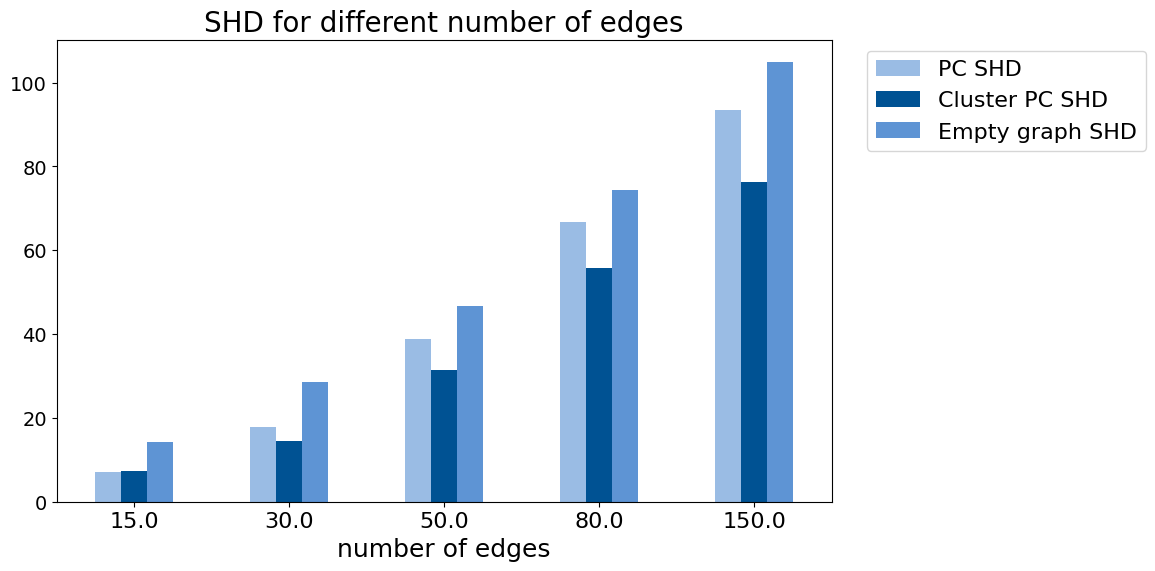

In [57]:
# colors = ['#A4C2F4', '#3333FF', '#4D68D5']
colors = ['#9ABCE4', '#005293', '#5E94D4']
data.groupby('n_edges')[dist_metrics].mean().plot(kind='bar', figsize=(10, 6), color = colors)
plt.title('SHD for different number of edges', fontsize = 20)
plt.xlabel('number of edges', fontsize=18)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.tick_params(axis = 'x', which = 'major', labelsize = 16, rotation = 0)
label_names = ['PC SHD', 'Cluster PC SHD', 'Empty graph SHD']
plt.legend(label_names, bbox_to_anchor = (1.42, 1),  fontsize=16, loc='upper right')